<a href="https://colab.research.google.com/github/Mrxdls/ML_practices/blob/main/Practices/Function_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

apply mathematical transformation on features
[
  - log transform
  - reciprocal
  - power
]

what happend after transformation
after tranforation
the data distribution converted into a normal distribution fuction
and through this its improve the perfomance of data

### function transform
 - log transform
 - reciprocal
 - square/squaroot
 - custorm

 ### power
 - boxcox
 - yeo jonson

#log transform

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day30-function-transformer/train.csv'
df = pd.read_csv(train_dataset, usecols=['Age', 'Fare', 'Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


can not impliment in negative values

can implemnet in right skew

In [4]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [5]:
import scipy.stats as stats

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-6-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

plot qq plot

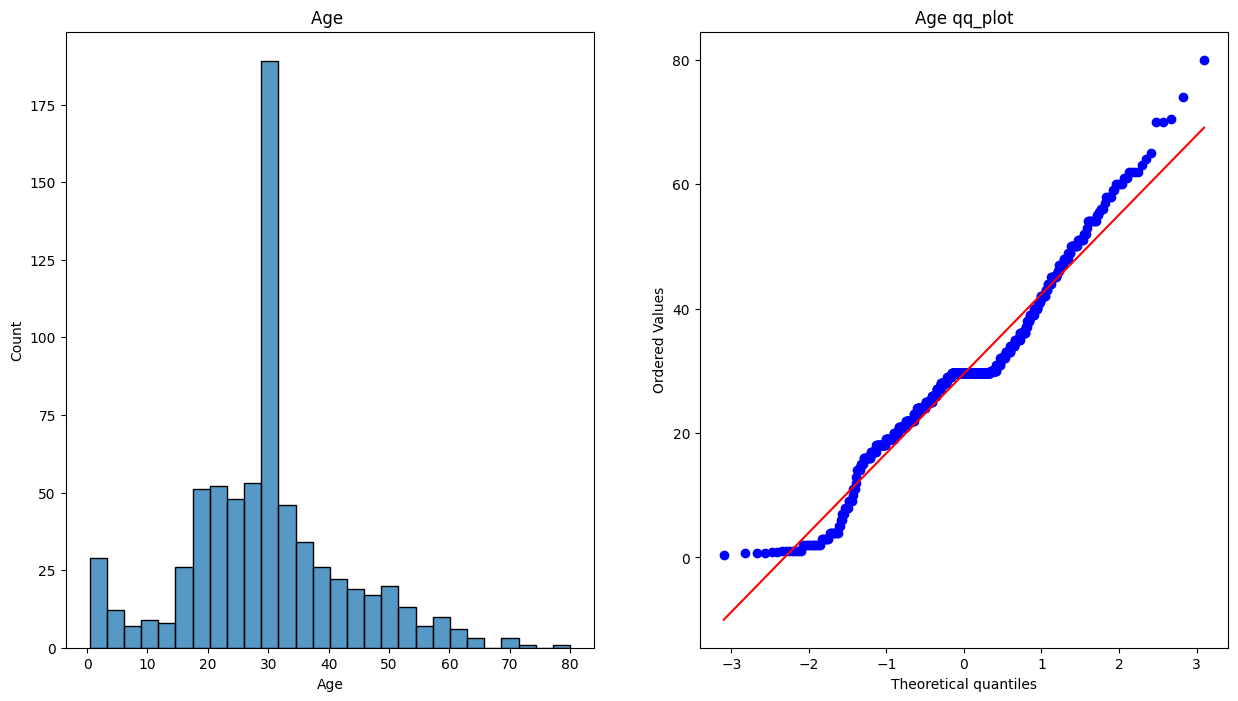

In [9]:
from math import log1p
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(X_train['Age'])
plt.title('Age ')
plt.subplot(1,2,2)
stats.probplot(X_train['Age'],dist='norm', plot=plt)
plt.title('Age qq_plot')
plt.show()

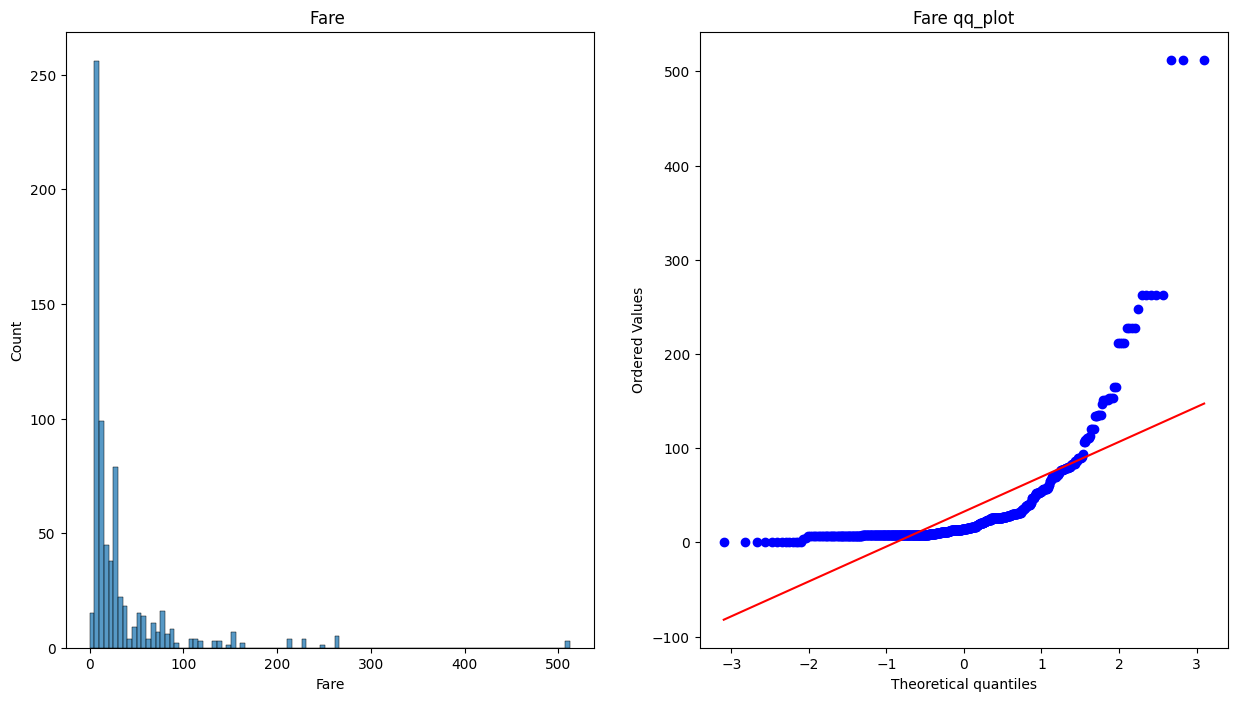

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(X_train['Fare'])
plt.title('Fare ')
plt.subplot(1,2,2)
stats.probplot(X_train['Fare'],dist='norm', plot=plt)
plt.title('Fare qq_plot')
plt.show()

model apply before log transform

In [11]:
clf1 = DecisionTreeClassifier()
clf2 = LogisticRegression()
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
print(f"on decision tree accuracy score is : {accuracy_score(y_test, y_pred1)}")
print(f"on decision tree accuracy score is : {accuracy_score(y_test, y_pred2)}")

on decision tree accuracy score is : 0.6759776536312849
on decision tree accuracy score is : 0.6480446927374302


In [12]:
#with cross validation
from sklearn.model_selection import cross_val_score
print(f"on decision tree accuracy score is : {cross_val_score(clf1, X_train, y_train, cv=42).mean()}")
print(f"on logistic regression accuracy score is : {cross_val_score(clf2, X_train, y_train, cv=42).mean()}")

on decision tree accuracy score is : 0.6219362745098039
on logistic regression accuracy score is : 0.6573879551820728


now we apply log transformation on data

In [13]:
trf1 = FunctionTransformer(func=np.log1p)
X_train_transform = trf1.fit_transform(X_train)
X_test_transform = trf1.transform(X_test)

In [14]:
def model():
  clf1 = DecisionTreeClassifier()
  clf2 = LogisticRegression()
  clf1.fit(X_train_transform, y_train)
  clf2.fit(X_train_transform, y_train)
  y_pred1 = clf1.predict(X_test_transform)
  y_pred2 = clf2.predict(X_test_transform)
  print(f"on decision tree accuracy score is : {accuracy_score(y_test, y_pred1)}")
  print(f"on logistic regression accuracy score is : {accuracy_score(y_test, y_pred2)}")

In [15]:
model()

on decision tree accuracy score is : 0.6759776536312849
on logistic regression accuracy score is : 0.6815642458100558


In [16]:
print(f"on decision tree accuracy score is : {cross_val_score(clf1, X_train_transform, y_train, cv=42).mean()}")
print(f"on logistic regression accuracy score is : {cross_val_score(clf2, X_train_transform, y_train, cv=42).mean()}")

on decision tree accuracy score is : 0.6277135854341738
on logistic regression accuracy score is : 0.678483893557423


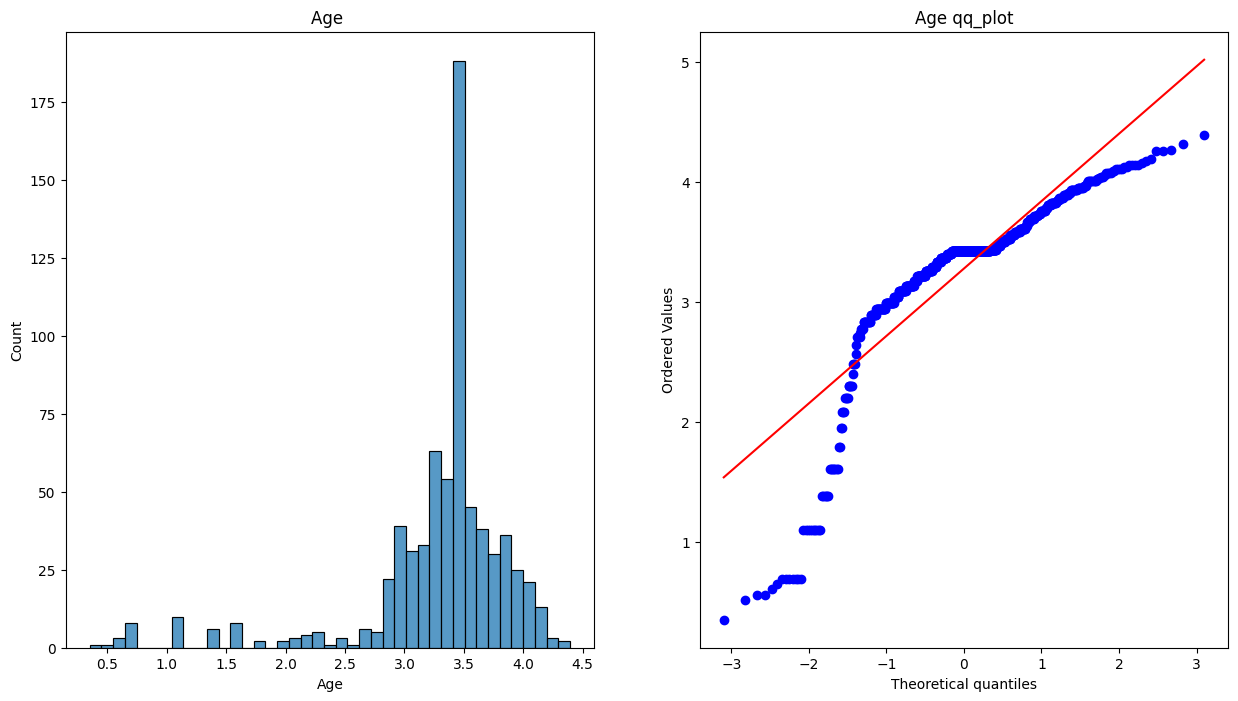

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(X_train_transform['Age'])
plt.title('Age ')
plt.subplot(1,2,2)
stats.probplot(X_train_transform['Age'],dist='norm', plot=plt)
plt.title('Age qq_plot')
plt.show()

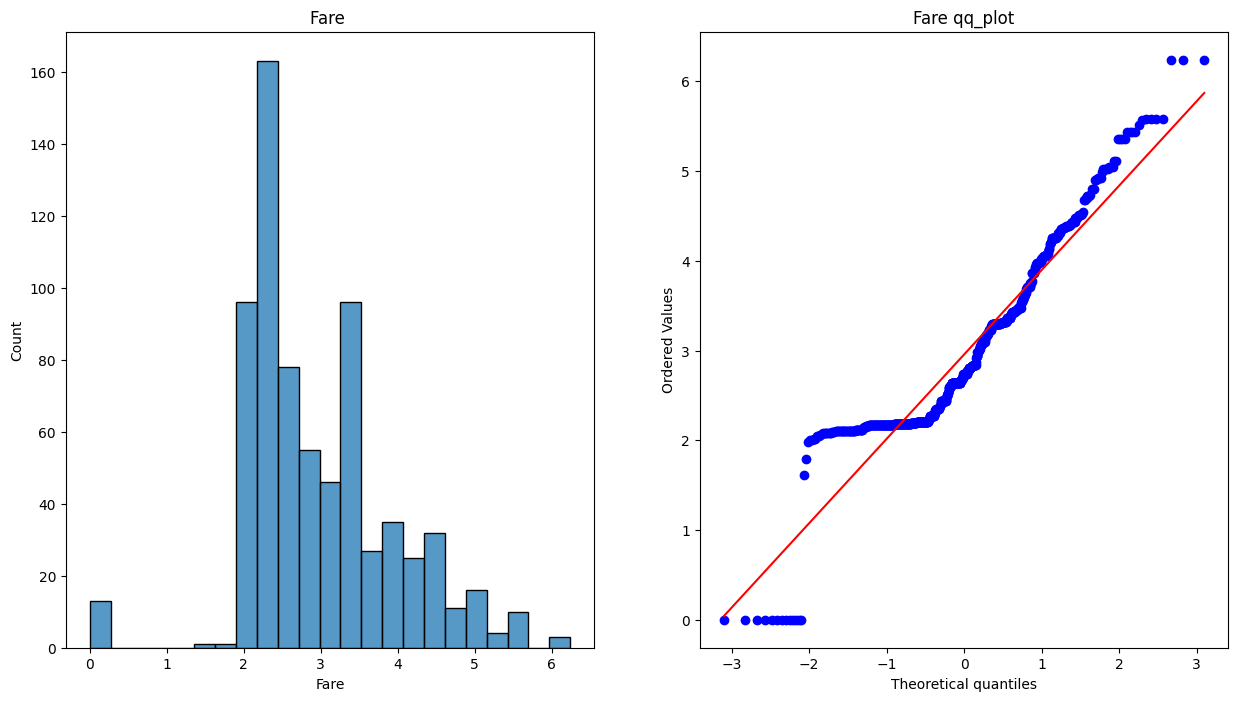

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(X_train_transform['Fare'])
plt.title('Fare ')
plt.subplot(1,2,2)
stats.probplot(X_train_transform['Fare'],dist='norm', plot=plt)
plt.title('Fare qq_plot')
plt.show()

In [19]:
from re import X
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(func=np.log1p), ['Fare'])
], remainder='passthrough')
X_train_transform = trf2.fit_transform(X_train)
X_test_transform = trf2.transform(X_test)

In [20]:
model()

on decision tree accuracy score is : 0.6815642458100558
on logistic regression accuracy score is : 0.6703910614525139


In [21]:
print(f"on decision tree accuracy score is : {cross_val_score(clf1, X_train_transform, y_train, cv=10).mean()}")
print(f"on logistic regression accuracy score is : {cross_val_score(clf2, X_train_transform, y_train, cv=10).mean()}")

on decision tree accuracy score is : 0.6207550860719875
on logistic regression accuracy score is : 0.6572378716744913


In [22]:
def apply_transform(transform):
  transformer = FunctionTransformer(func=transform)
  trf3 = ColumnTransformer([
    ('transform', transformer, ['Fare'])
  ], remainder='passthrough')
  X_train_transform = trf3.fit_transform(X_train)
  X_test_transform = trf3.transform(X_test)

  X_test_transform = pd.DataFrame(X_test_transform, columns=X_train.columns)
  X_train_transform = pd.DataFrame(X_train_transform, columns=X_train.columns)

  clf1 = DecisionTreeClassifier()
  clf2 = LogisticRegression()
  clf1.fit(X_train_transform, y_train)
  clf2.fit(X_train_transform, y_train)
  y_pred1 = clf1.predict(X_test_transform)
  y_pred2 = clf2.predict(X_test_transform)
  plt.figure(figsize=(15,8))
  plt.subplot(1,2,1)
  stats.probplot(X_train['Fare'],dist='norm', plot=plt)
  plt.title('without transform fare qq_plot')
  # plt.show()
  plt.subplot(1,2,2)
  stats.probplot(X_train_transform['Fare'],dist='norm', plot=plt)
  plt.title(' with transform Fare qq_plot')
  plt.show()
  print(f"on decision tree accuracy score is : {accuracy_score(y_test, y_pred1)}")
  print(f"on logistic regression accuracy score is : {accuracy_score(y_test, y_pred2)}")

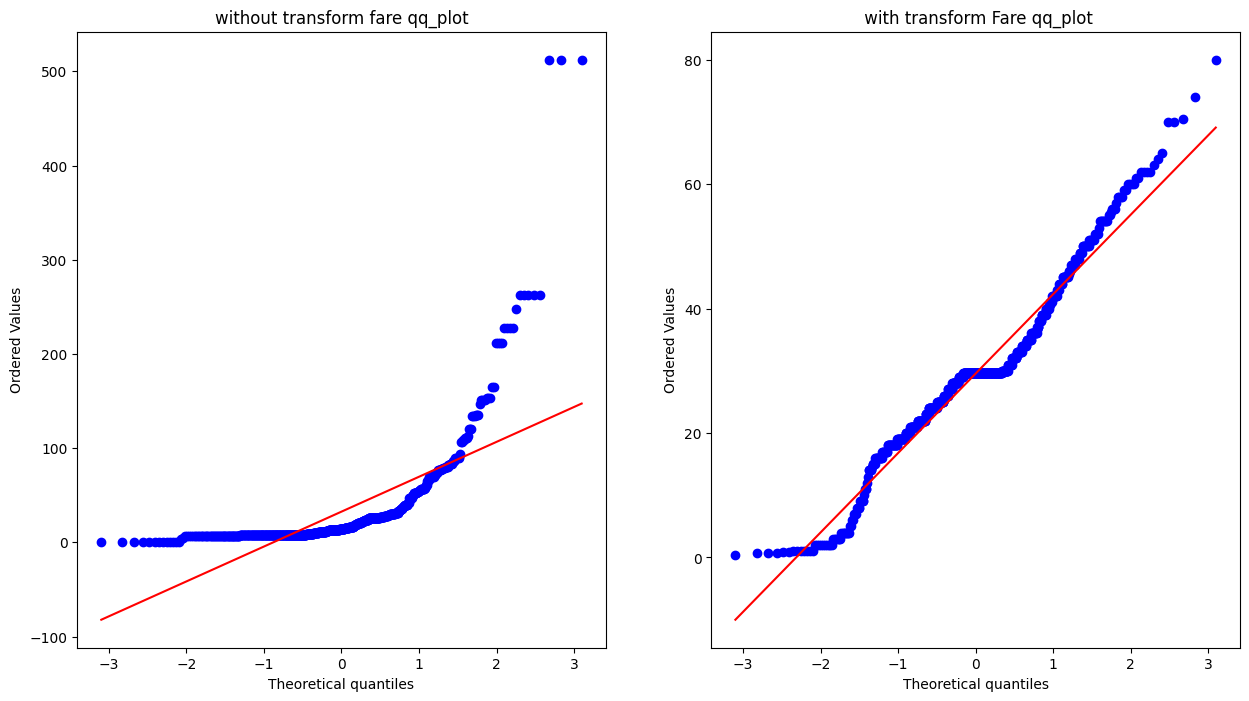

on decision tree accuracy score is : 0.659217877094972
on logistic regression accuracy score is : 0.6703910614525139


In [23]:
apply_transform(np.log1p)

#Reciprocal

#square

#Squared root

#Power transformer

###BOX-COX

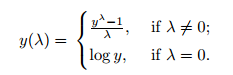

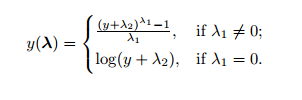

only applicable to the number that are positive or we can say greater than 0

the exponent is here is a variable called lambda that is varies over the range of -5 to 5, and in the process of searching, we examine all values of lambda. finally, we choose hte optimal values( resulting in best approximation to a normal Distribution) for your variable.

###*yeo*- johnson transform
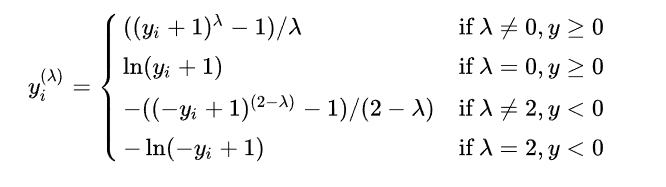

this transformation is somewhat of an adjustment to the Box-Cox Transformation, by which we can apply it to negative numbers.

Power-Transform

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [25]:
power_data = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day31-power-transformer/concrete_data.csv'
df = pd.read_csv(power_data)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [26]:
df.shape

(1030, 9)

In [27]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [30]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [31]:
x = df.drop('Strength', axis=1)
y = df['Strength']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
x_test

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [65]:
def linear_reg(x_train, x_test, y_train, y_test, x, y):
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  print(f'r2 score is : {r2}')
  cross = cross_val_score(model, x, y, cv=10)
  print(f'cross validation score is : {cross.mean()}')

In [67]:
linear_reg(x_train, x_test, y_train, y_test, x,y)

r2 score is : 0.627553179231485
cross validation score is : 0.27820729160873814


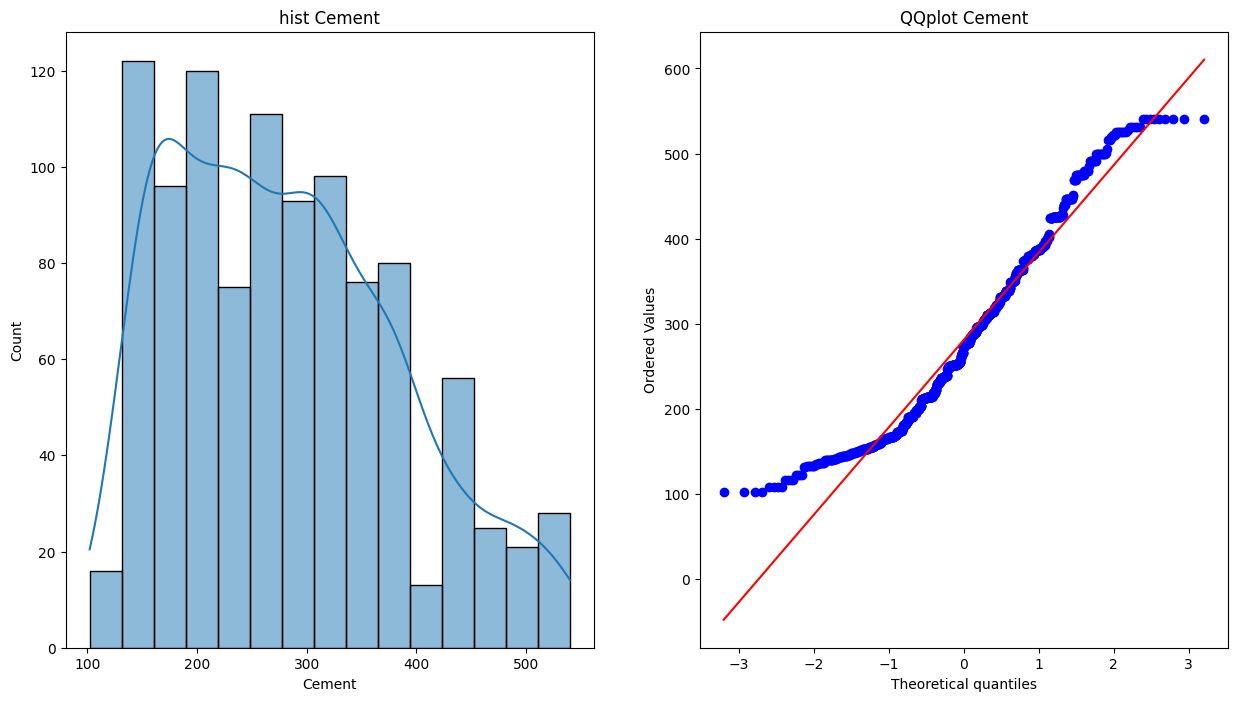

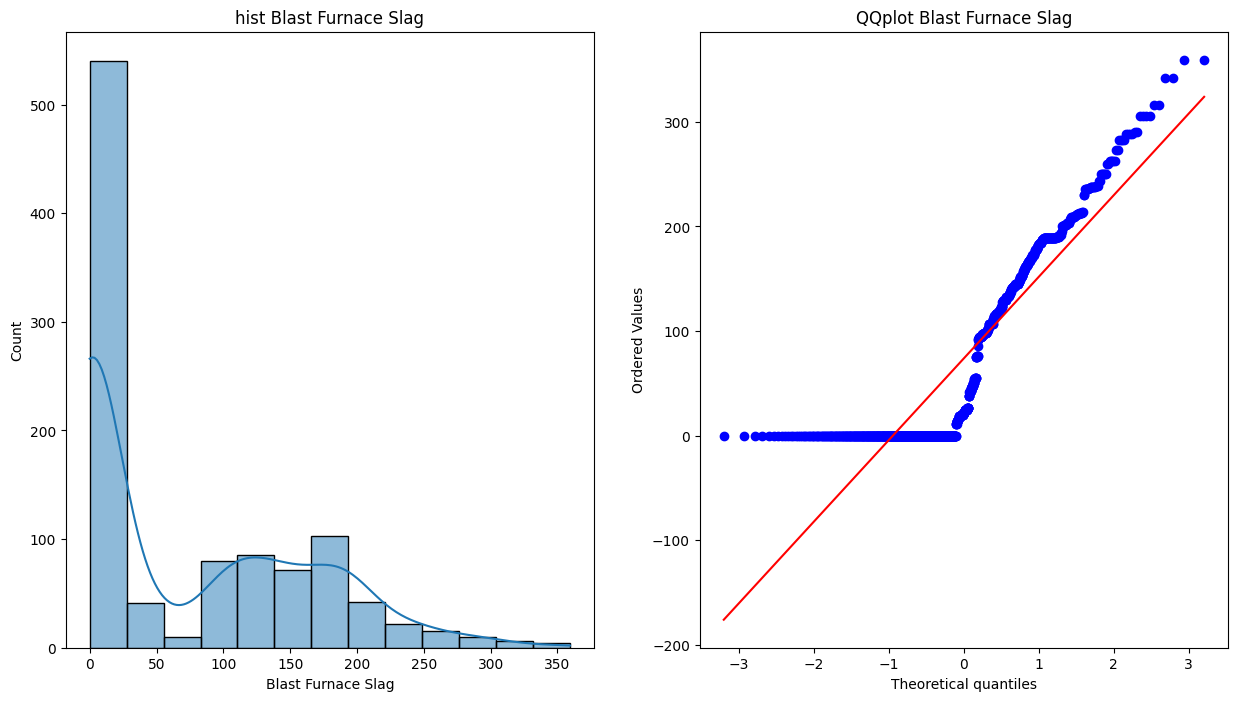

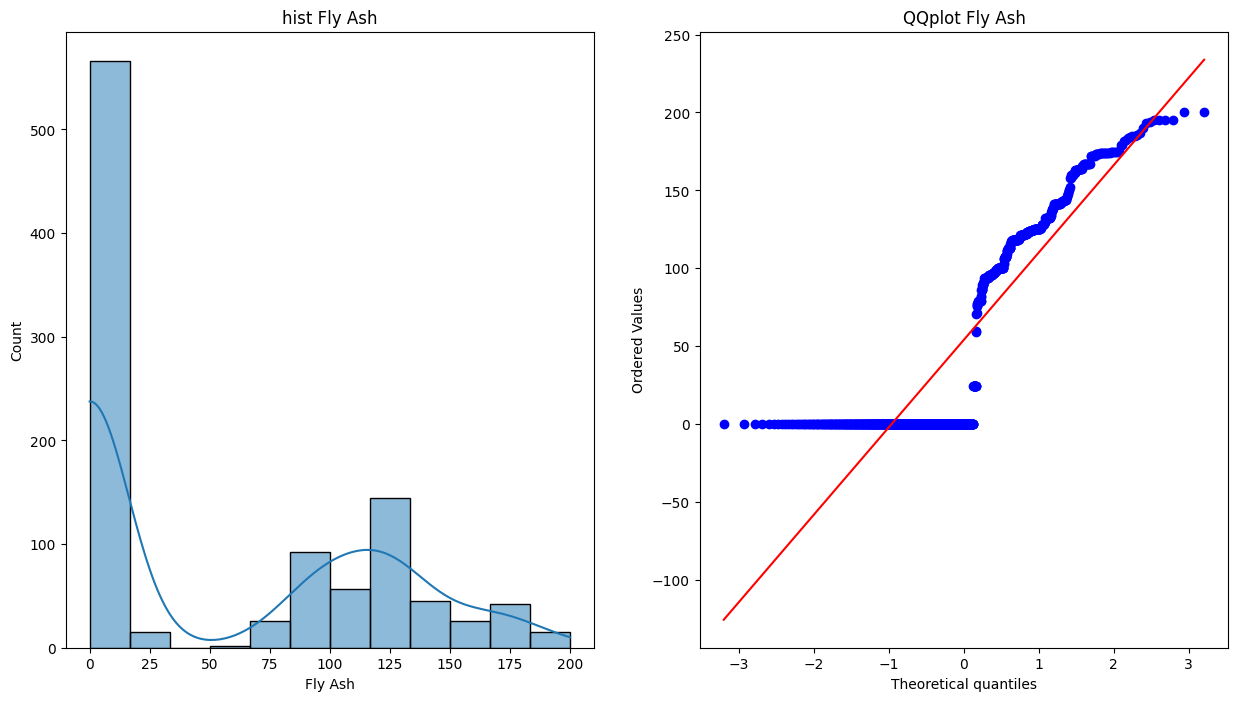

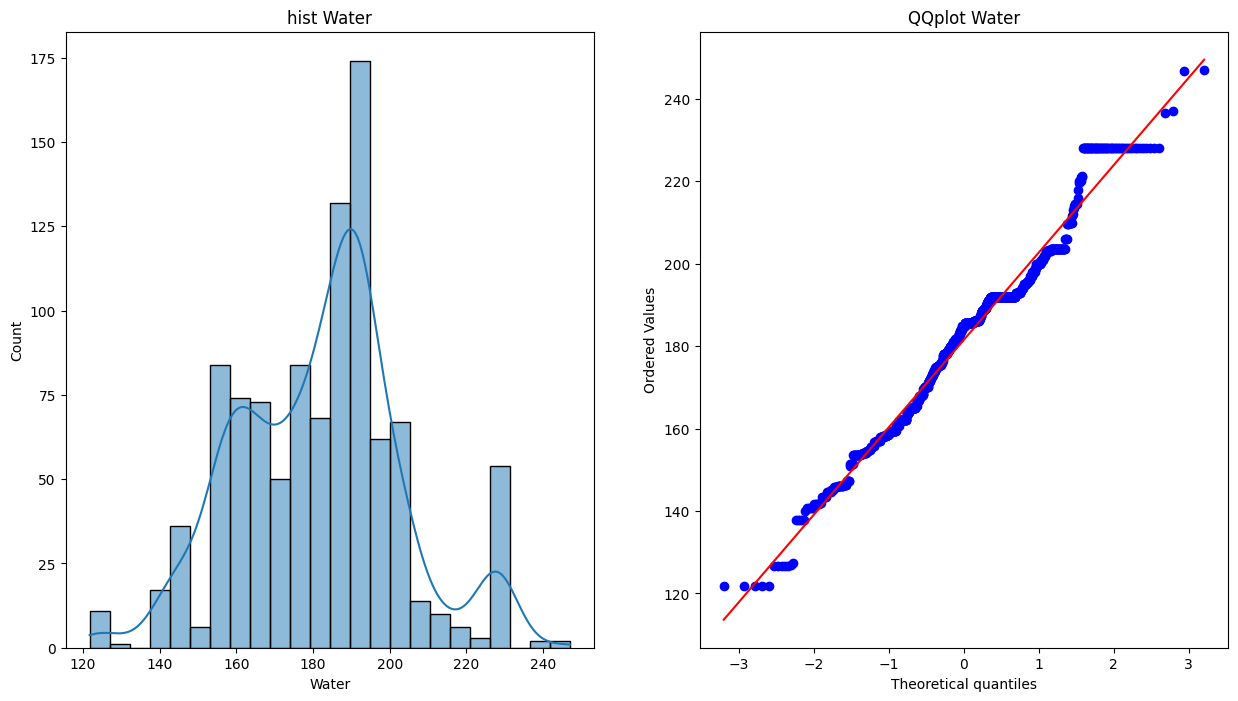

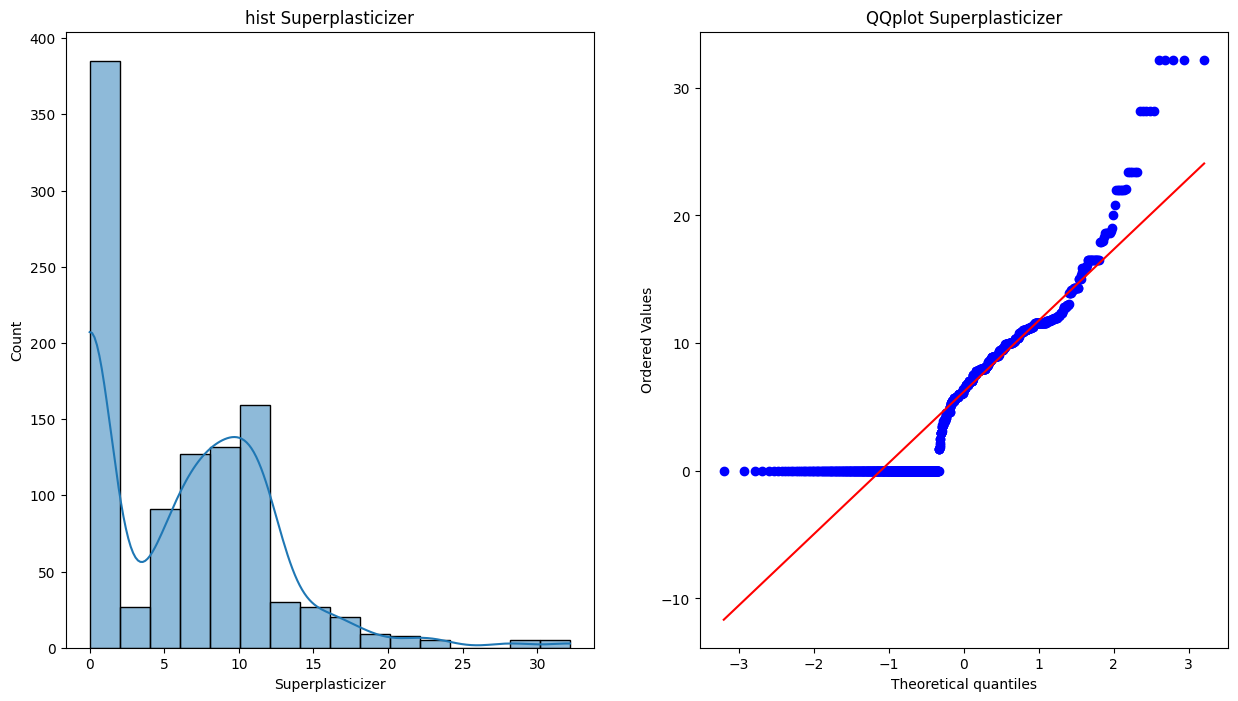

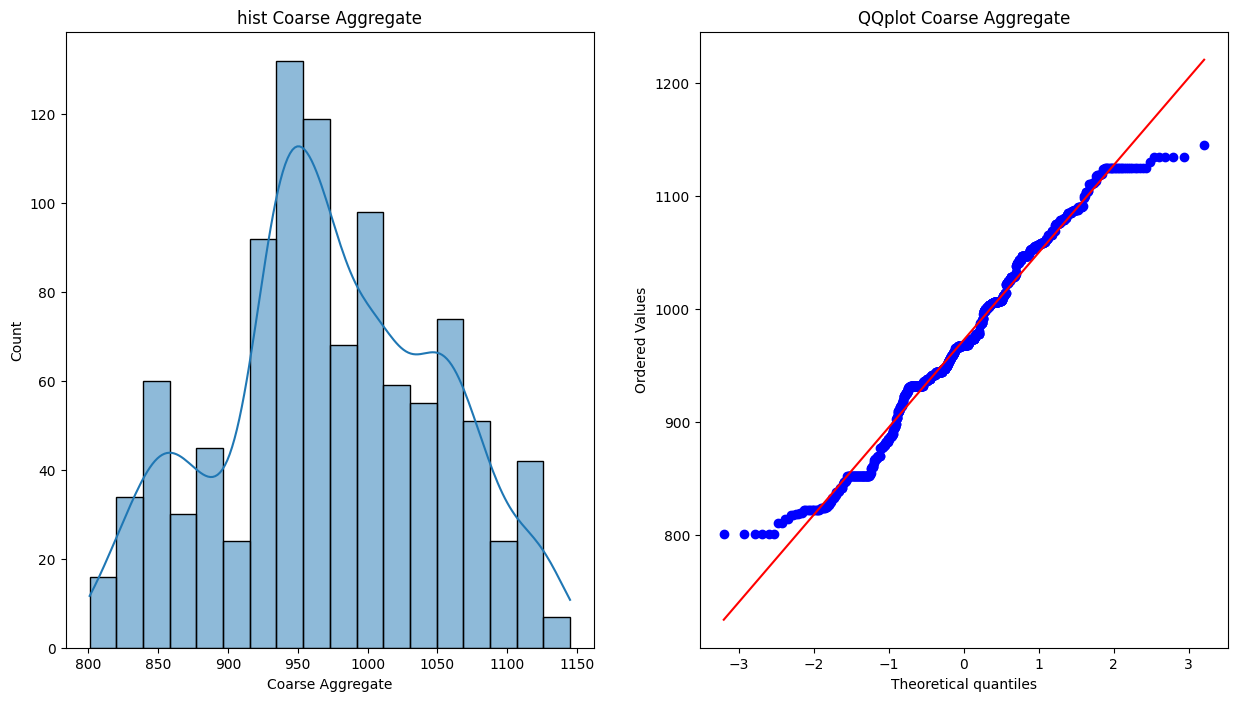

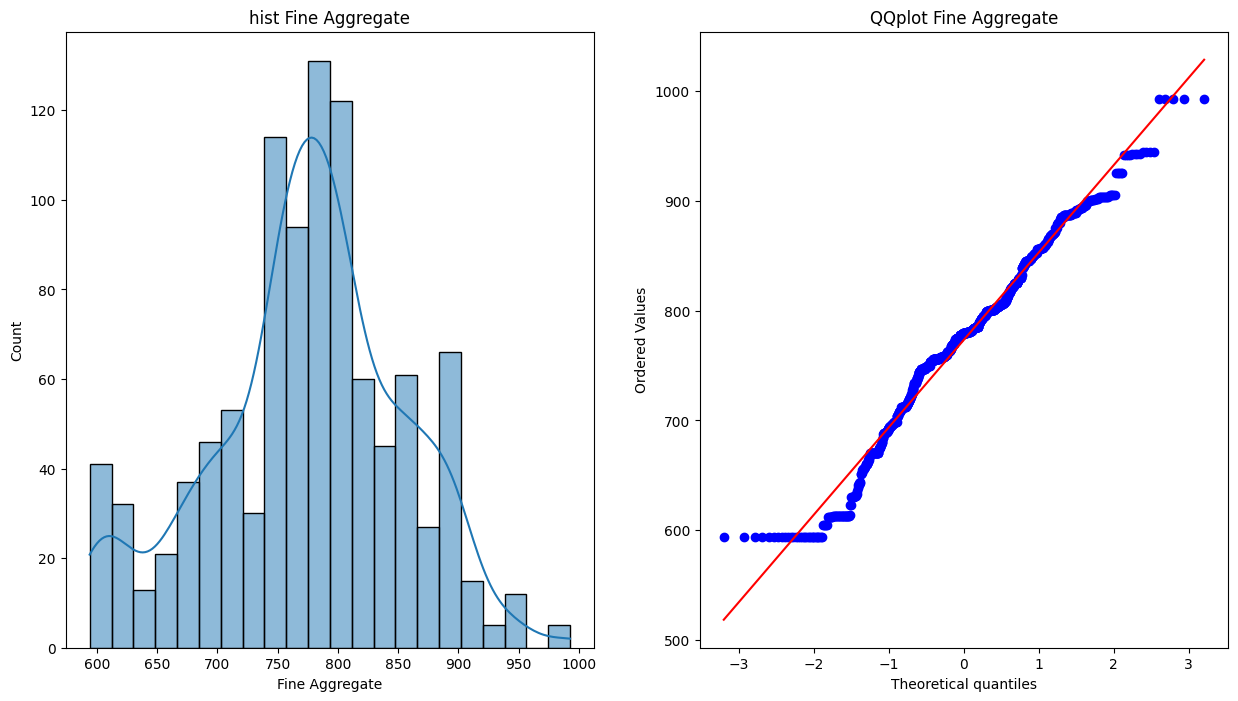

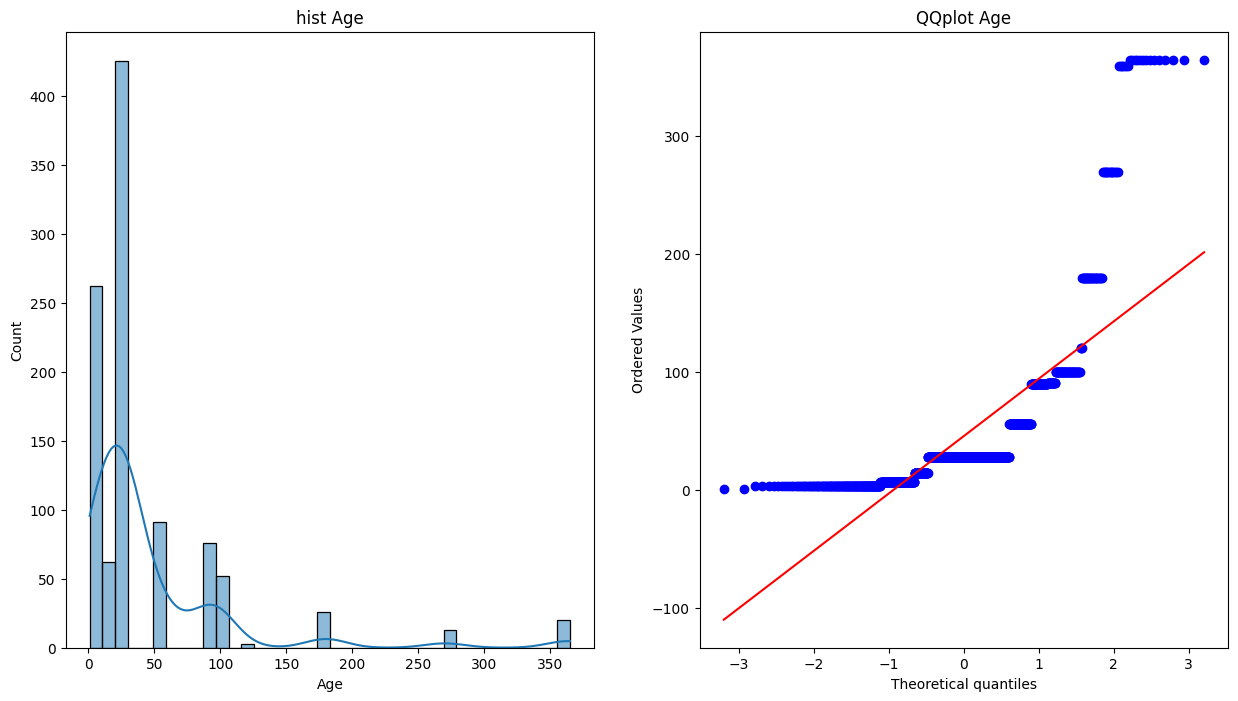

In [44]:
for col in x.columns:
  plt.figure(figsize=(15,8))
  plt.subplot(1,2,1)
  sns.histplot(x[col], kde=True)
  plt.title(f'hist {col}')
  plt.subplot(1,2,2)
  stats.probplot(x[col], dist='norm', plot=plt)
  plt.title(f'QQplot {col}')
  plt.show()

In [49]:
# Applying Box-cox Transformation
pt = PowerTransformer(method='box-cox')
x_train_pt = pt.fit_transform(x_train+0.00000000000001)
x_test_pt = pt.transform(x_test+0.00000000000001)

In [53]:
# just to know the inrernal working
pd.DataFrame({'cols':x_train.columns, 'boxcox_lambda': pt.lambdas_})

,cols,boxcox_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.013519
2,Fly Ash,-0.019488
3,Water,0.772682
4,Superplasticizer,0.047313
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [68]:
# power transform on complete x
pt = PowerTransformer(method='box-cox')
x_transform = pt.fit_transform(x+0.00000000000001)
linear_reg(x_train_pt, x_test_pt, y_train, y_test,x_transform, y)

r2 score is : 0.802406209056991
cross validation score is : 0.6440295547430321


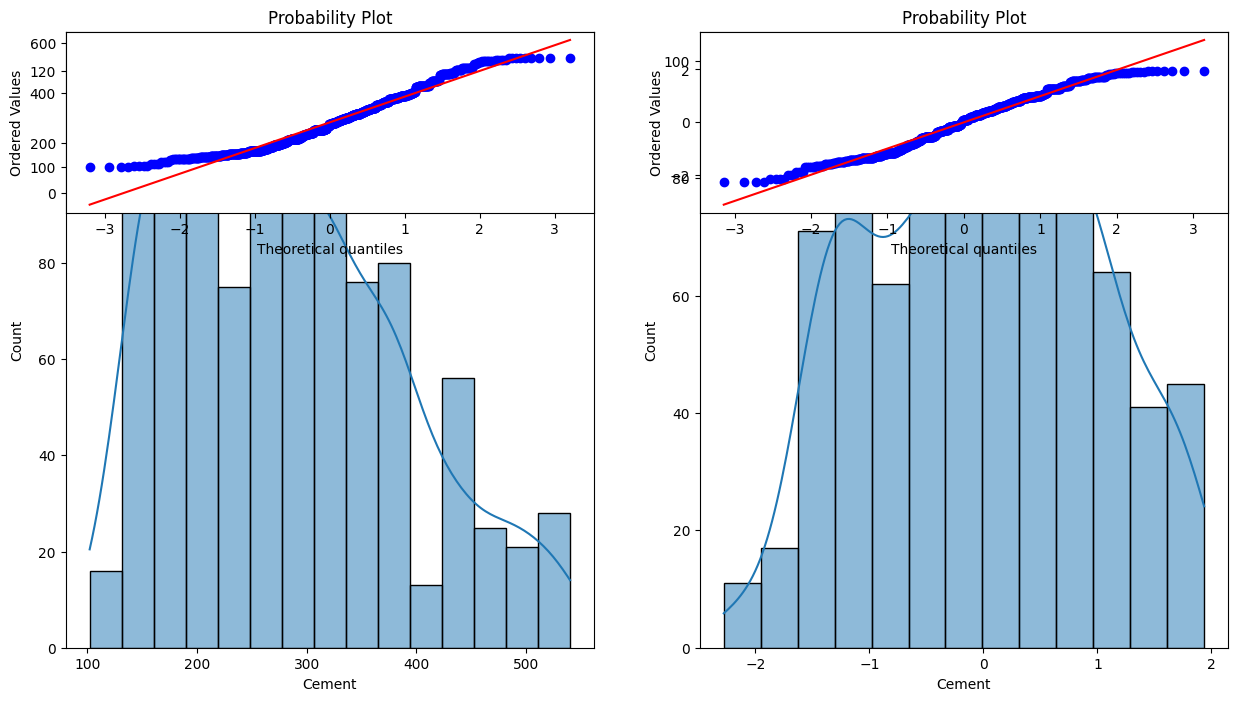

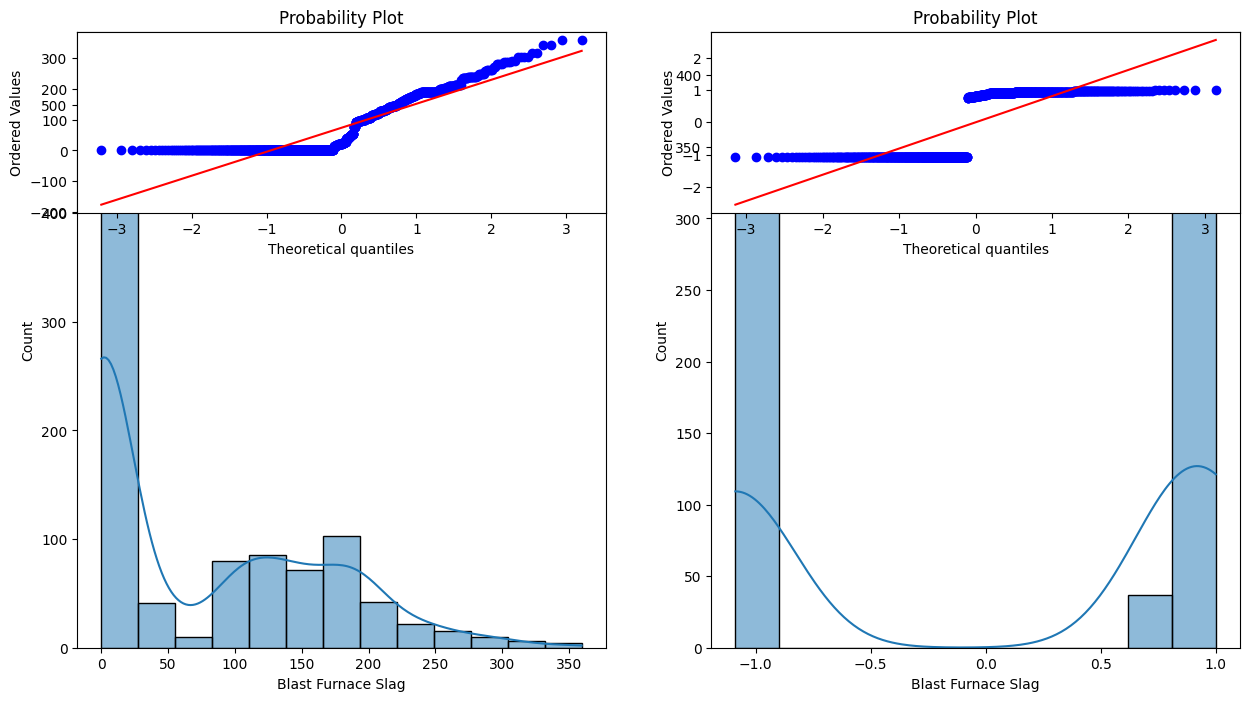

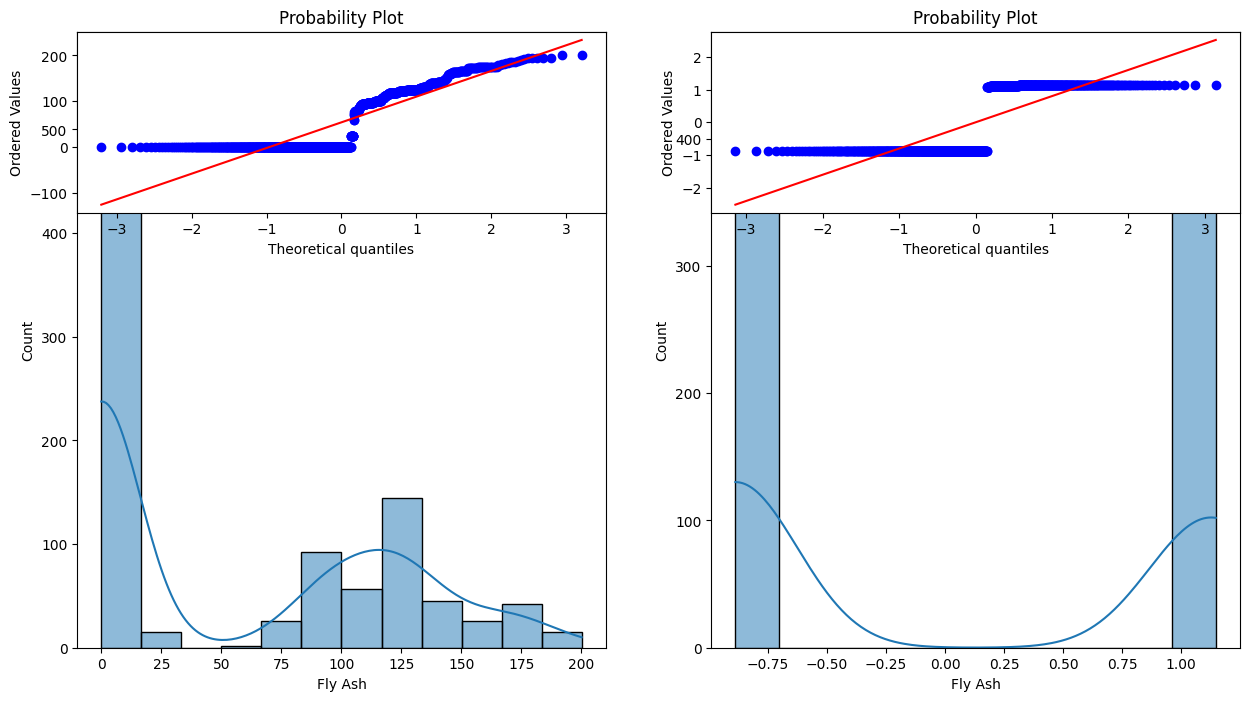

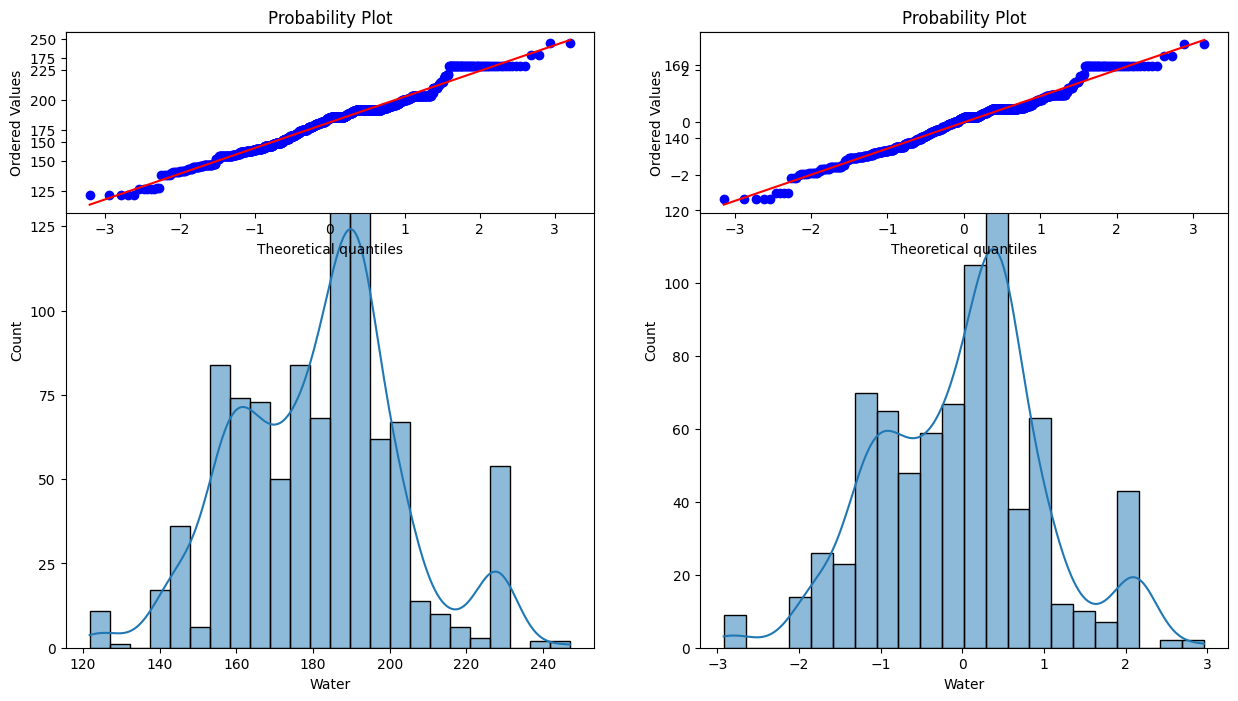

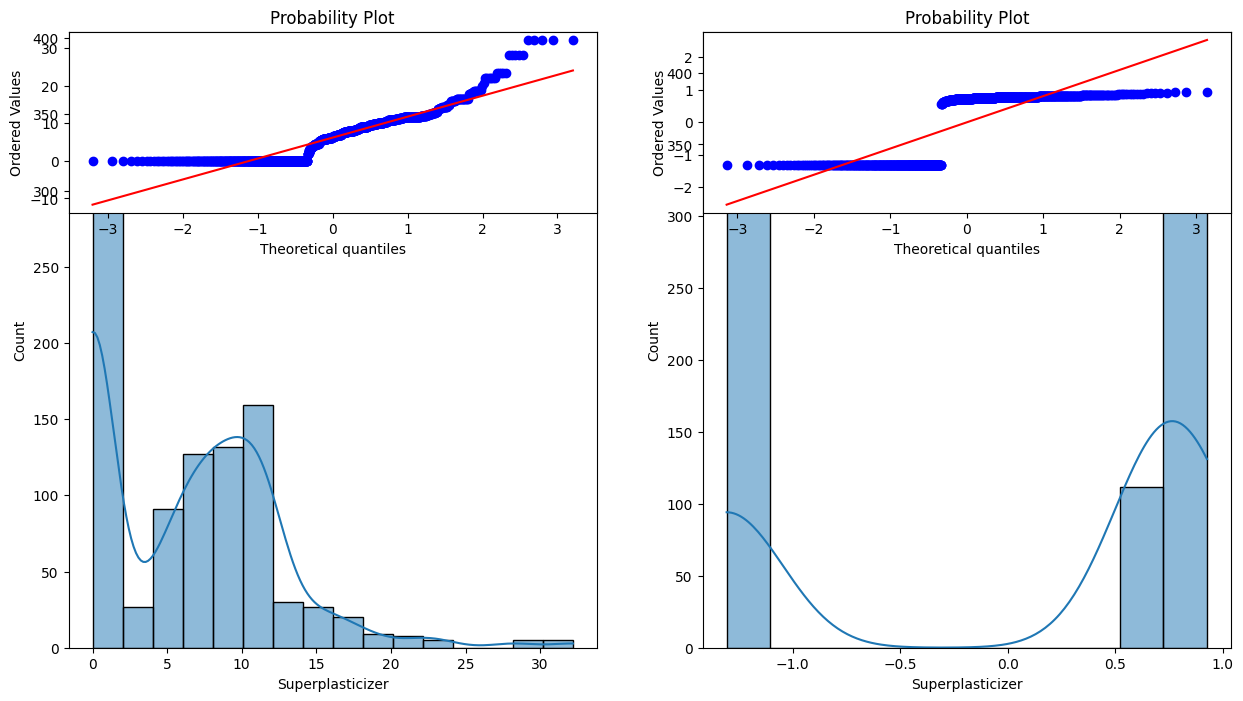

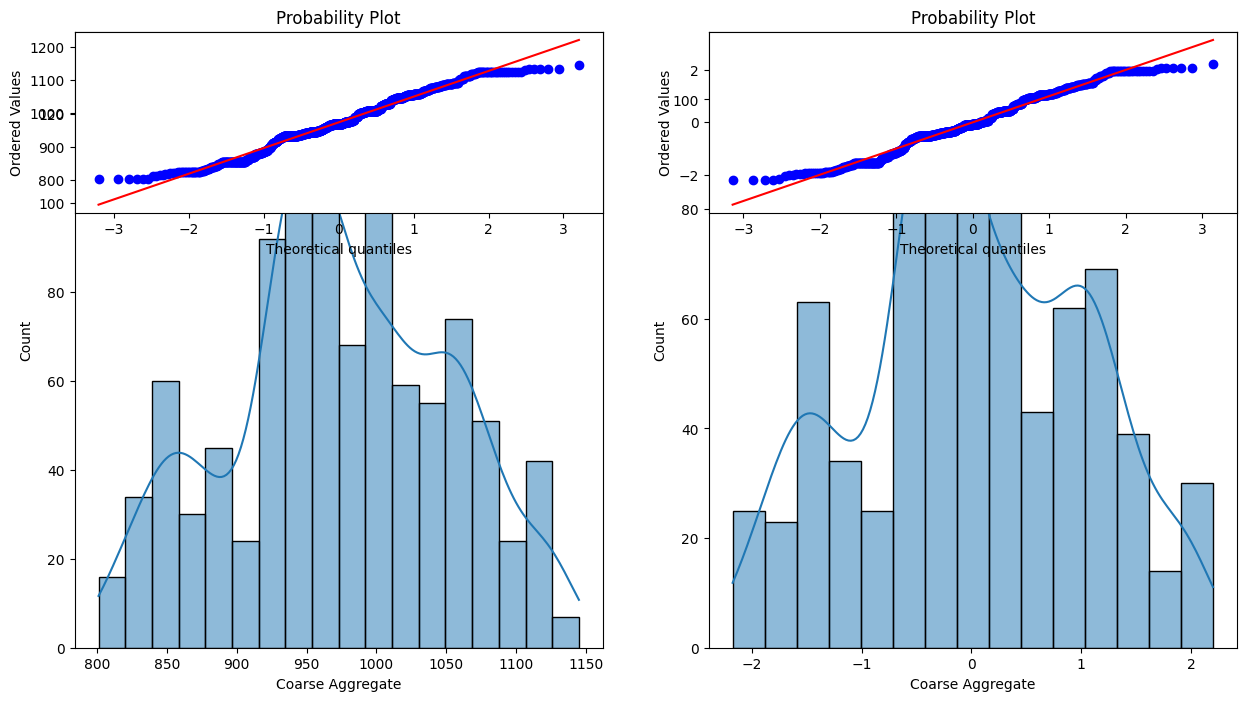

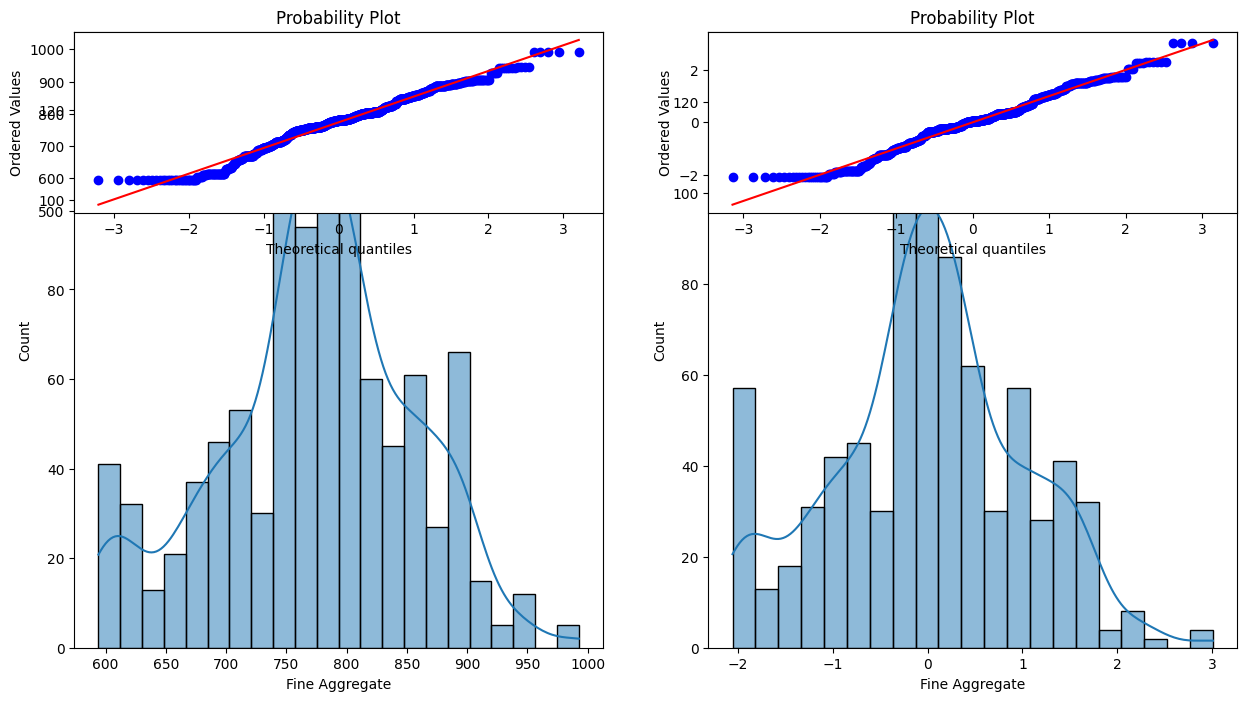

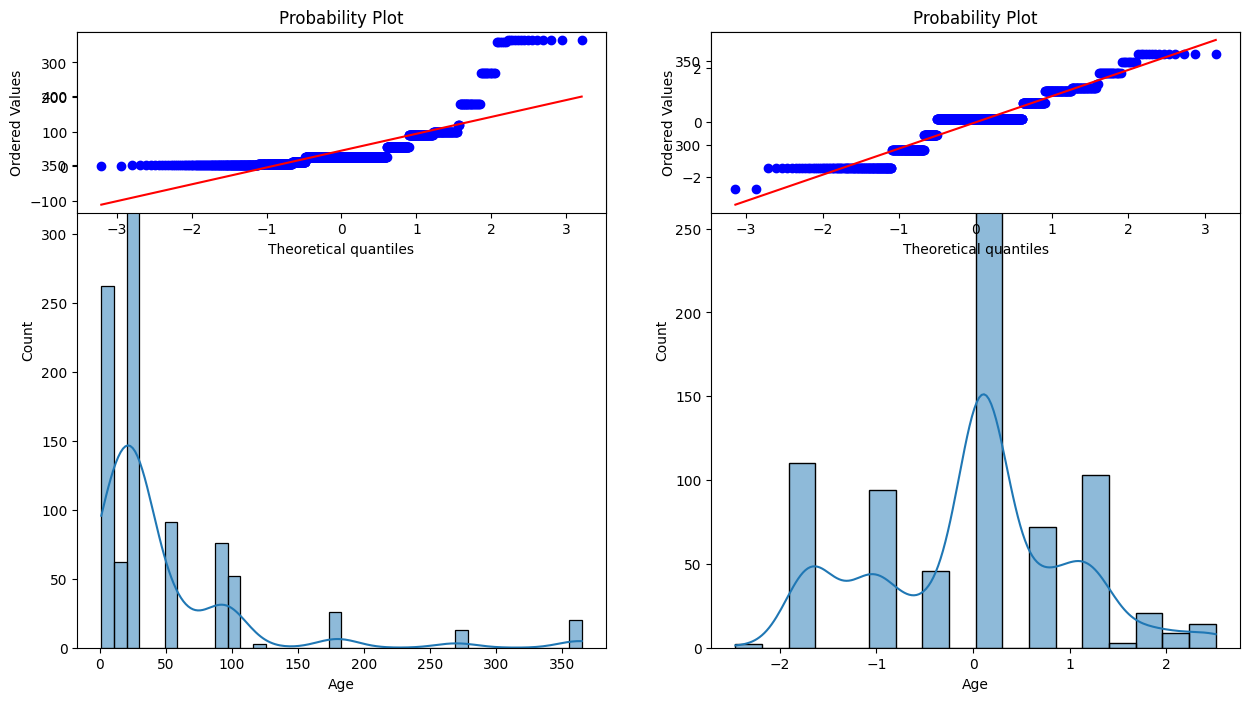

In [78]:
x_test_pt = pd.DataFrame(x_test_pt, columns=x_train.columns)
x_train_pt = pd.DataFrame(x_train_pt, columns=x_train.columns)


for i in x_train_pt.columns:
  plt.figure(figsize=(15,8))
  plt.subplot(1,2,1)
  sns.histplot(x[i], kde=True)
  # plt.title(f'hist without transform {i}')
  plt.subplot(1,2,2)
  sns.histplot(x_train_pt[i], kde=True)
  # plt.title(f'hist with transform {i}')
  plt.subplot(3,2,1)
  stats.probplot(x[i], dist='norm', plot=plt)
  # plt.title(f'QQplot without transform {i}')
  plt.subplot(3,2,2)
  stats.probplot(x_train_pt[i], dist='norm', plot=plt)
  # plt.title(f'QQplot with transform {i}')
  plt.show()

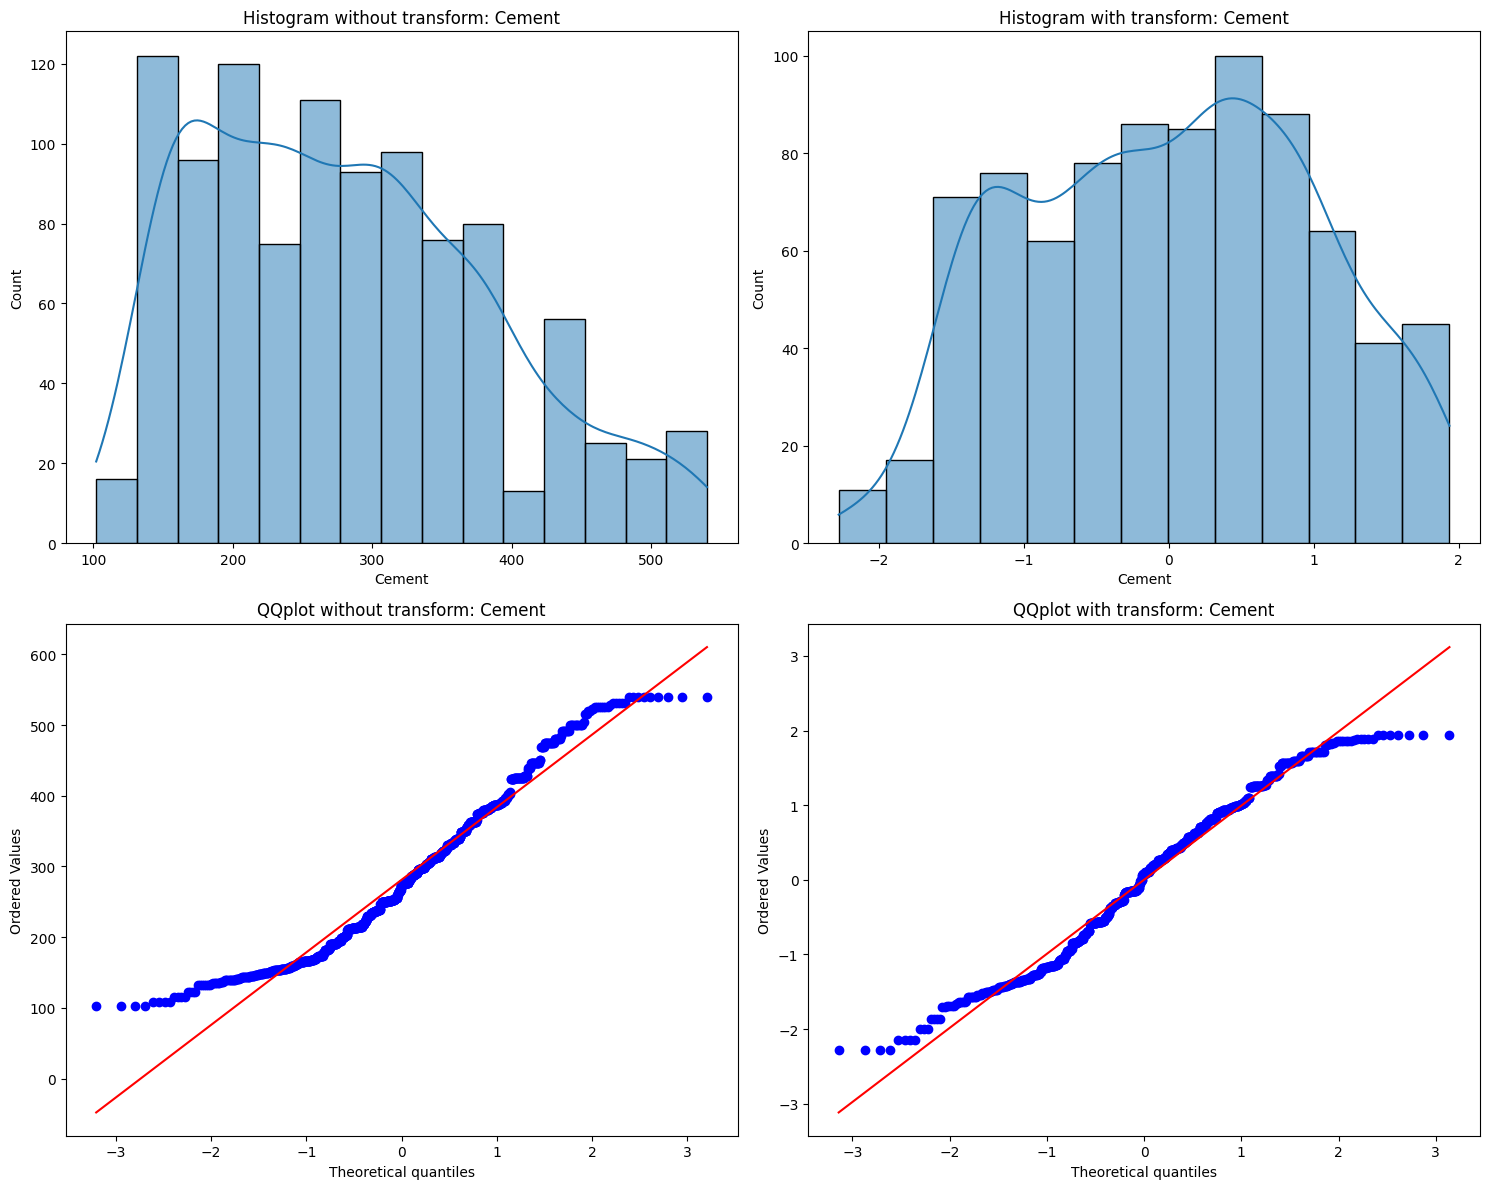

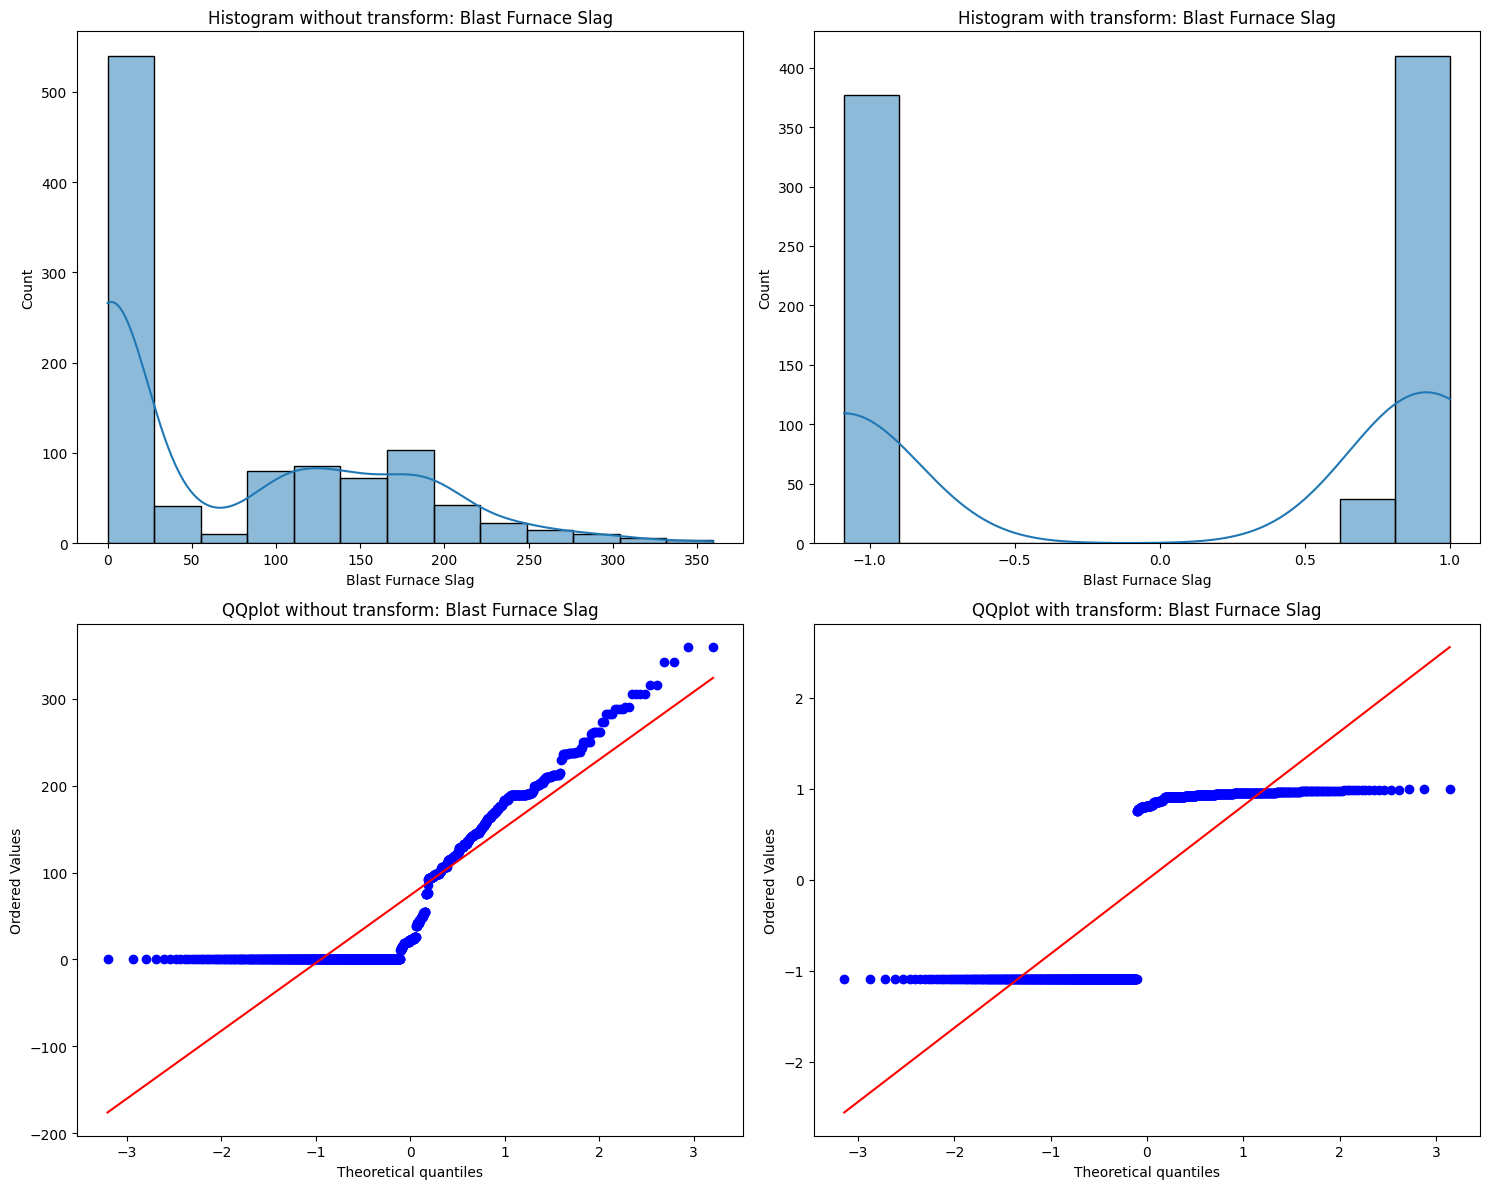

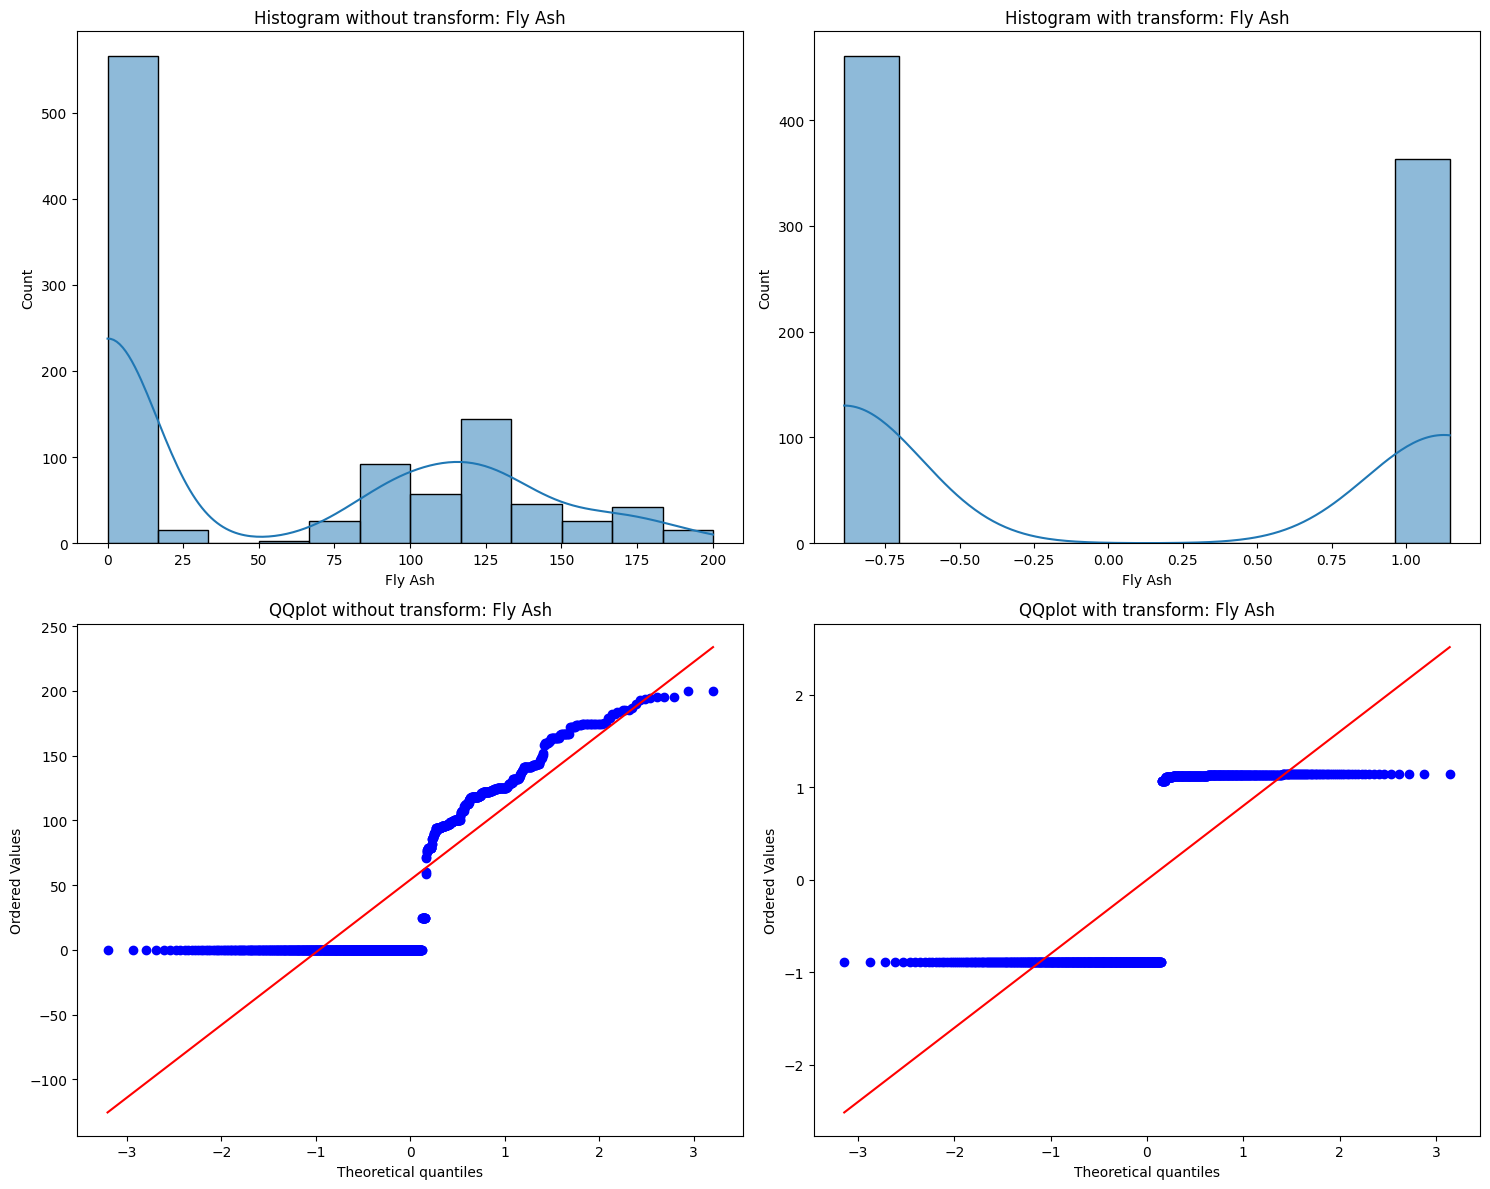

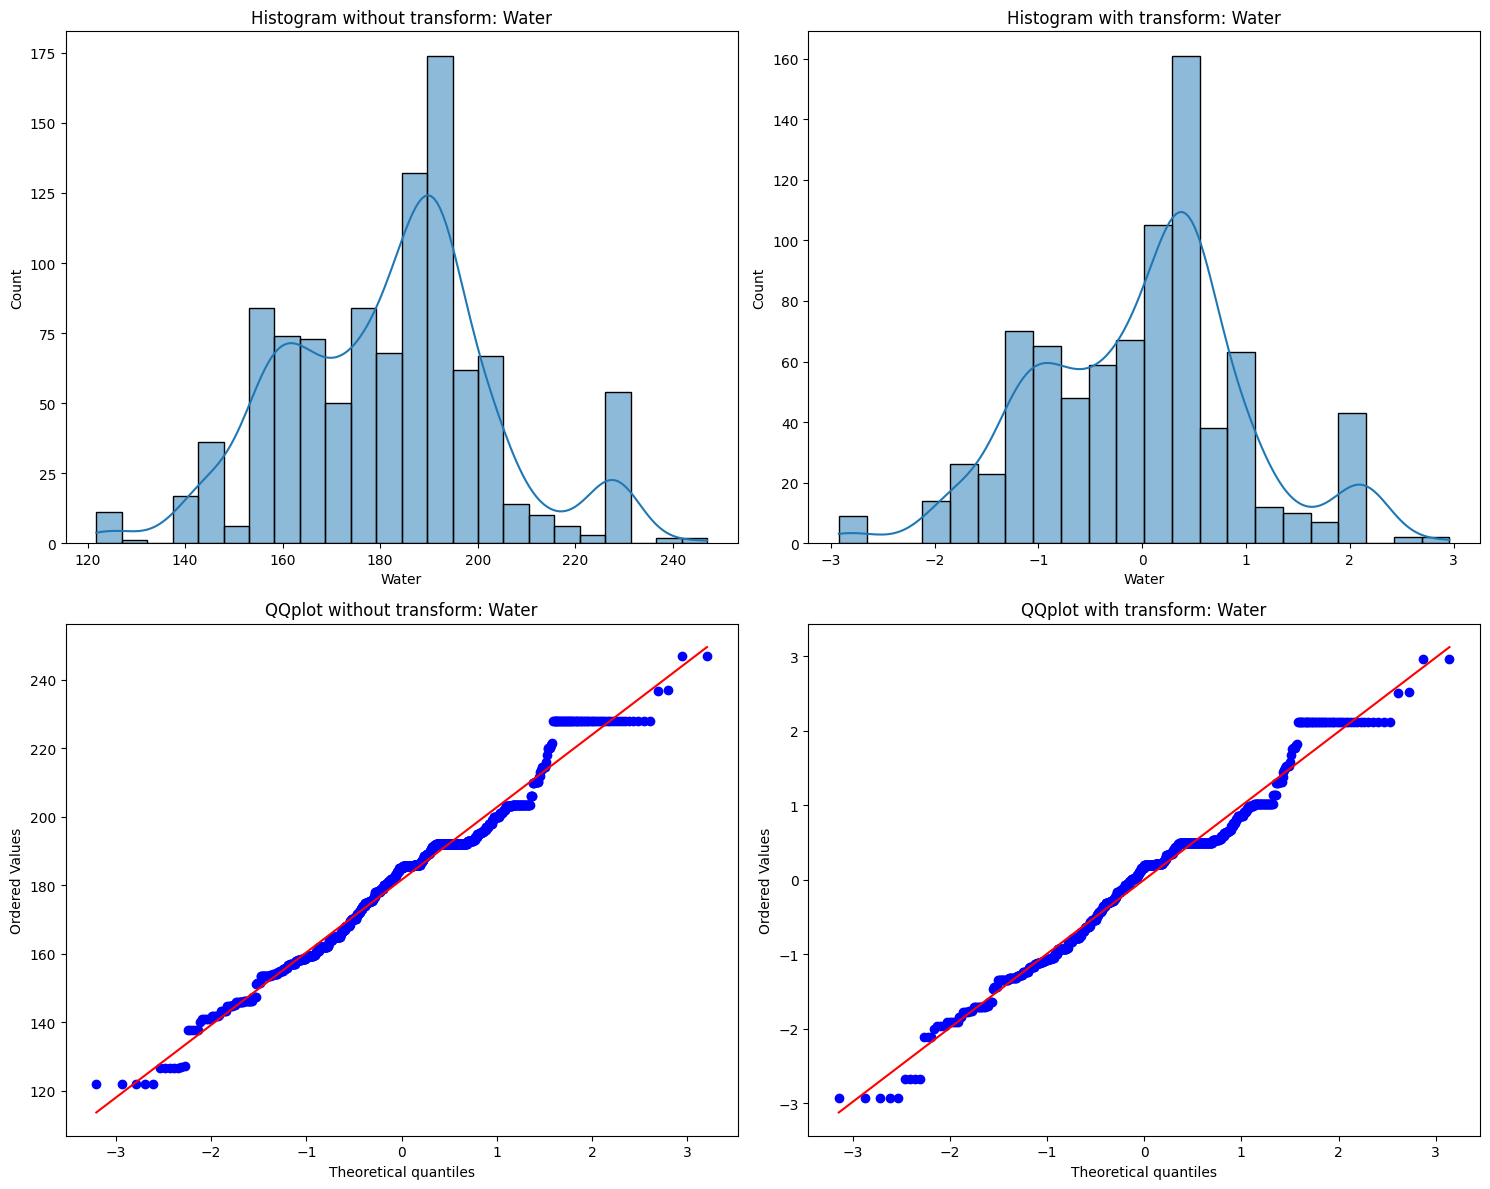

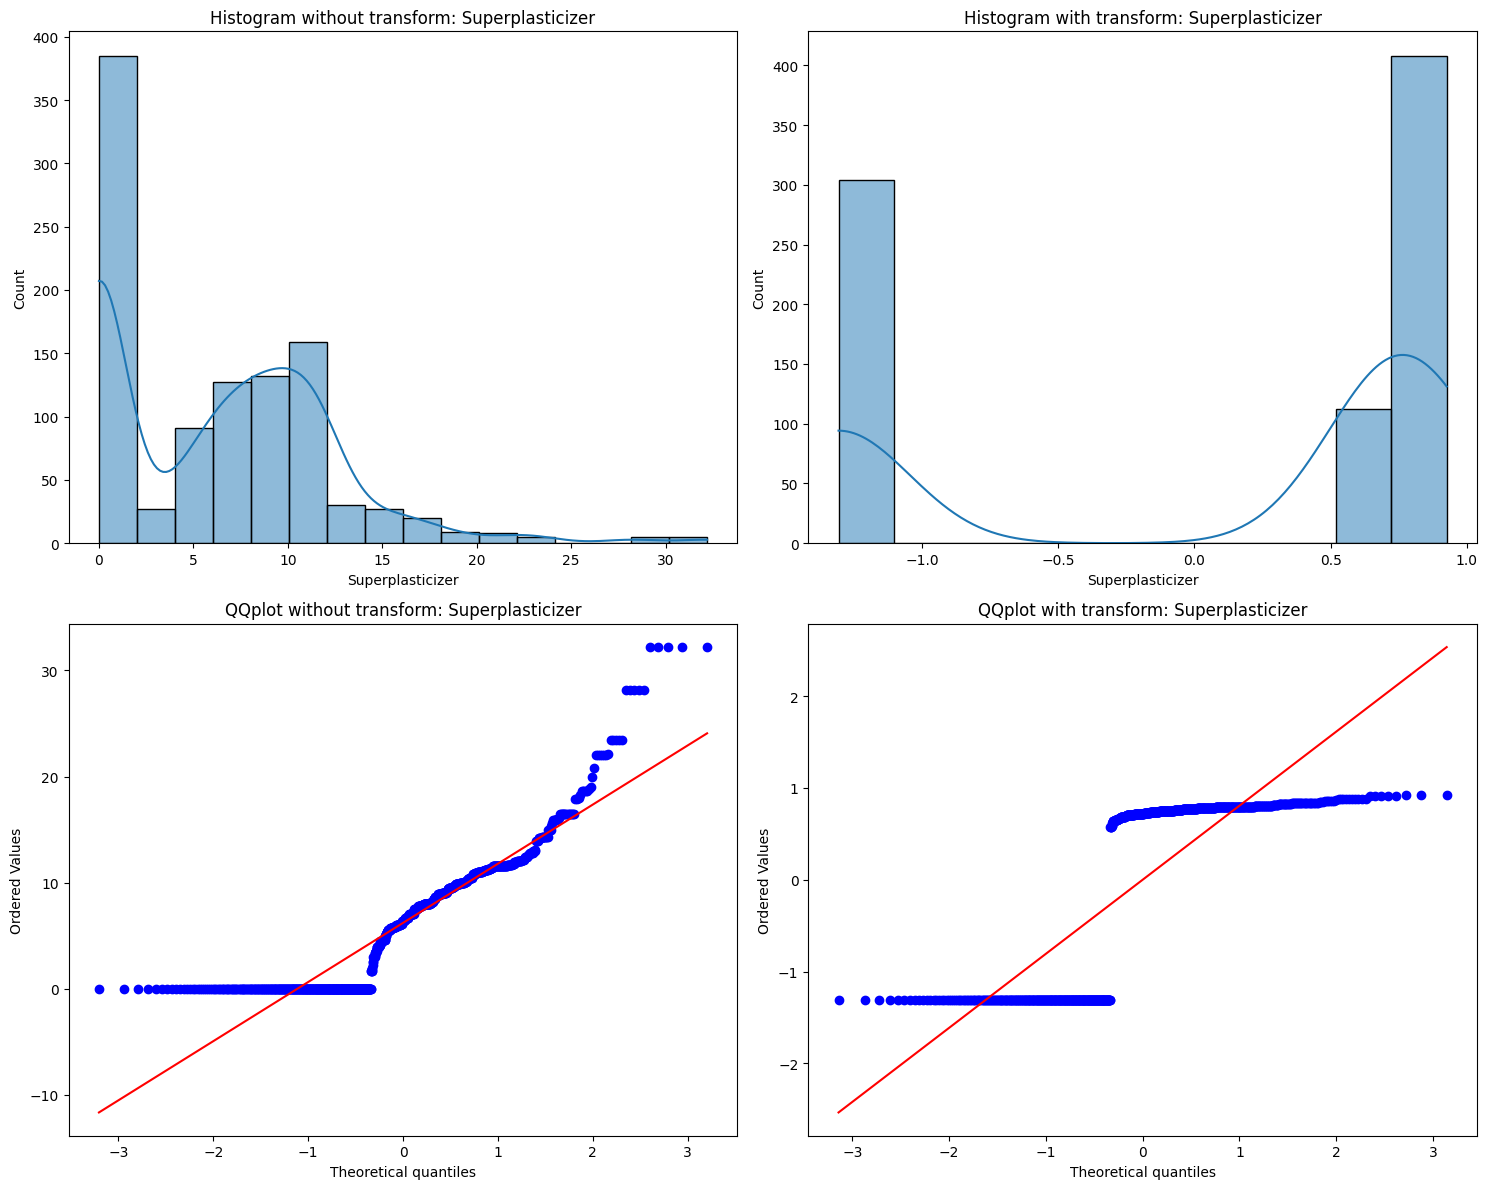

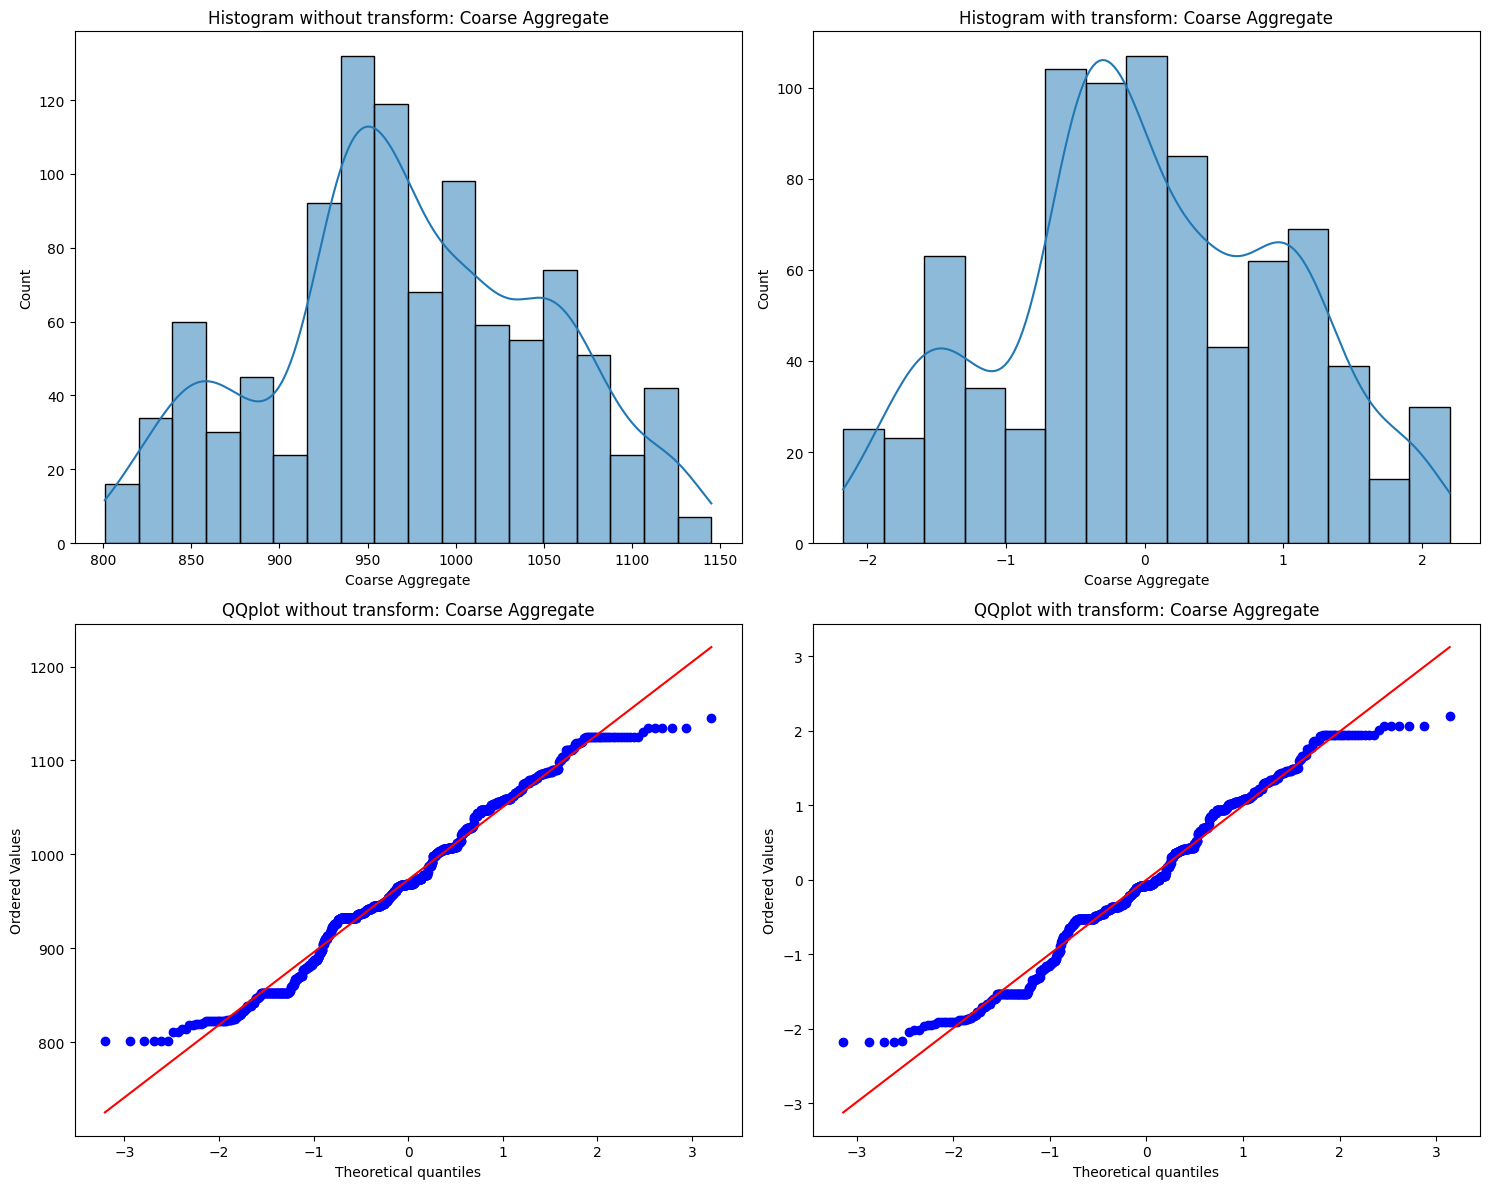

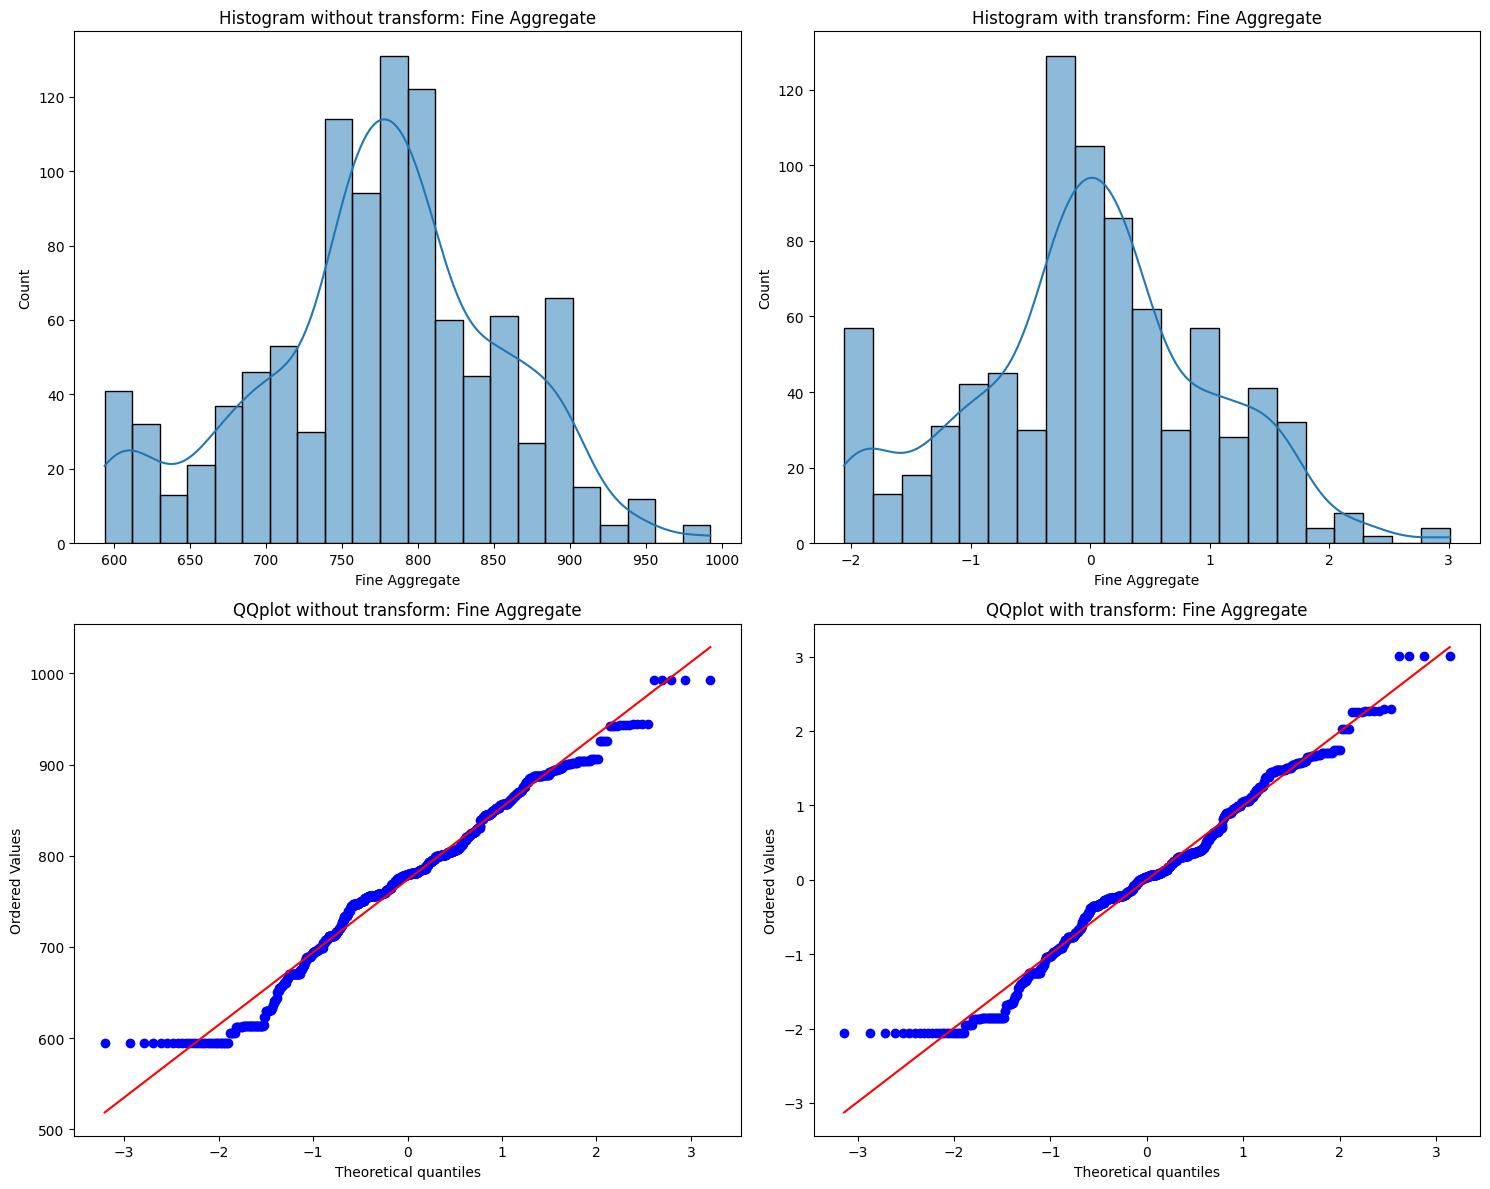

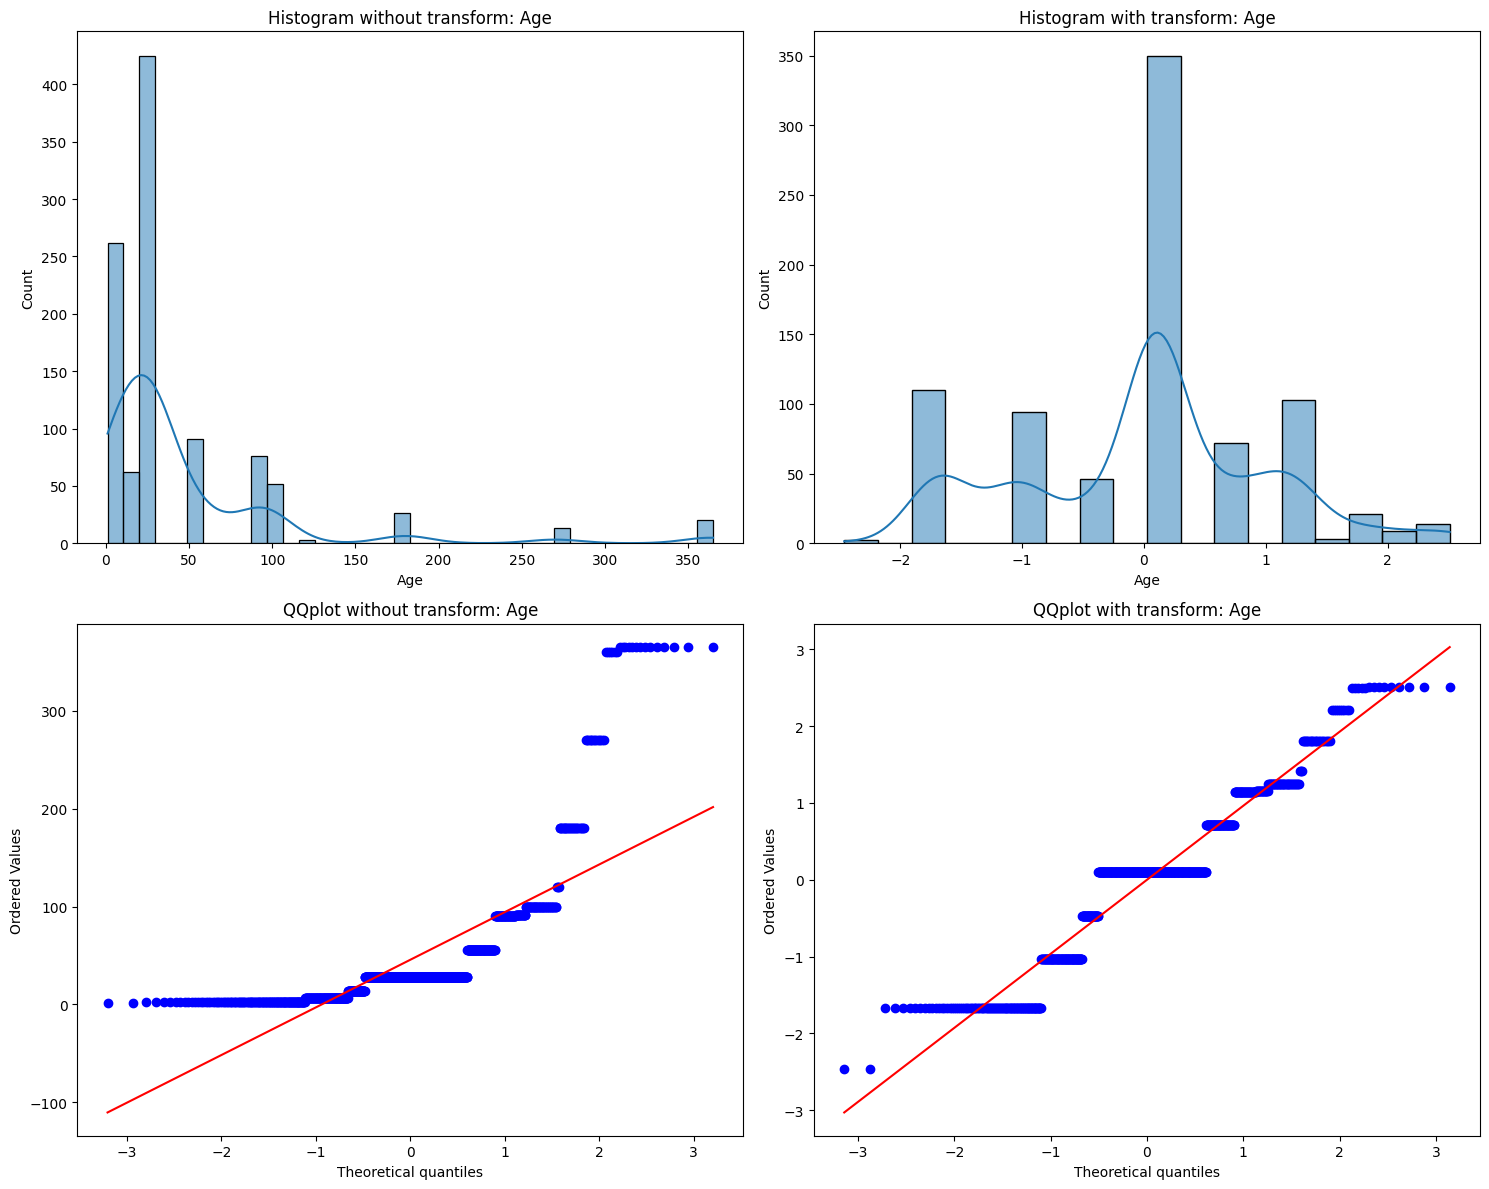

In [79]:
for i in x_train_pt.columns:
  fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 columns

  # Histogram without transform
  sns.histplot(x[i], kde=True, ax=axes[0, 0])
  axes[0, 0].set_title(f'Histogram without transform: {i}')

  # Histogram with transform
  sns.histplot(x_train_pt[i], kde=True, ax=axes[0, 1])
  axes[0, 1].set_title(f'Histogram with transform: {i}')

  # QQplot without transform
  stats.probplot(x[i], dist='norm', plot=axes[1, 0])
  axes[1, 0].set_title(f'QQplot without transform: {i}')

  # QQplot with transform
  stats.probplot(x_train_pt[i], dist='norm', plot=axes[1, 1])
  axes[1, 1].set_title(f'QQplot with transform: {i}')

  plt.tight_layout()  # Adjusts subplot params for a tight layout
  plt.show()

In [92]:
pt2 = PowerTransformer(method='yeo-johnson')
x_train_pt2 = pt2.fit_transform(x_train)
x_test_pt2 = pt2.transform(x_test)

In [93]:
plt_x = PowerTransformer(method='yeo-johnson')
x_transform_pt2 = plt_x.fit_transform(x)

In [95]:
linear_reg(x_train_pt2, x_test_pt2, y_train, y_test, x_transform_pt2, y)

r2 score is : 0.8161906512004999
cross validation score is : 0.658654862909492
